#Problem Statment
"Sports Basics" is a sports blog company that entered space recently. They
wanted to get more traffic to their website by releasing a special edition magazine on IPL 2024. This magazine aims to provide interesting insights and facts forfans, analysts and teams based on the last 3 years' data.
The chief editor Tony Sharma oversees this publication, and he believes in data
analytics. He reached out to Peter Pandey, a journalist in his team who is a data savvy cricket enthusiast.

In [303]:
#Data Manipulation.
import pandas as pd
#Numeric Python
import numpy as np
from scipy.stats import stats
import statsmodels
#Data Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded=files.upload()

Saving dim_match_summary.csv to dim_match_summary.csv
Saving dim_players.csv to dim_players.csv
Saving fact_bating_summary.csv to fact_bating_summary.csv
Saving fact_bowling_summary.csv to fact_bowling_summary.csv


In [3]:
df_match_summary=pd.read_csv("dim_match_summary.csv")
df_players=pd.read_csv("dim_players.csv")
df_batting_summary=pd.read_csv("fact_bating_summary.csv")
df_bowling_summary=pd.read_csv("fact_bowling_summary.csv")

In [4]:
df_match_summary.head()

,team1,team2,winner,margin,matchDate,match_id
0,Super Kings,KKR,Super Kings,27 runs,"Oct 15, 2021",T203817
1,Capitals,KKR,KKR,3 wickets,"Oct 13, 2021",T206442
2,RCB,KKR,KKR,4 wickets,"Oct 11, 2021",T208597
3,Capitals,Super Kings,Super Kings,4 wickets,"Oct 10, 2021",T201819
4,Capitals,RCB,RCB,7 wickets,"Oct 8, 2021",T205942


In [6]:
df_players.head()

,name,team,battingStyle,bowlingStyle,playingRole
0,RuturajGaikwad,Super Kings,Right hand Bat,Right arm Offbreak,Batter
1,FafduPlessis,Super Kings,Right hand Bat,Legbreak,Middle order Batter
2,RobinUthappa,Super Kings,Right hand Bat,Right arm Medium,Batter
3,MoeenAli,Super Kings,Left hand Bat,Right arm Offbreak,Batting Allrounder
4,ShubmanGill,KKR,Right hand Bat,Right arm Offbreak,Opening Batter


In [7]:
df_bowling_summary.head()

,match_id,match,bowlingTeam,bowlerName,overs,maiden,runs,wickets,economy,0s,4s,6s,wides,noBalls
0,T203817,Super Kings Vs KKR,KKR,ShakibAlHasan,3.0,0,33,0,11.0,6,2,3,0,0
1,T203817,Super Kings Vs KKR,KKR,ShivamMavi,4.0,0,32,1,8.0,8,1,2,0,0
2,T203817,Super Kings Vs KKR,KKR,LockieFerguson,4.0,0,56,0,14.0,4,7,2,2,0
3,T203817,Super Kings Vs KKR,KKR,VarunChakravarthy,4.0,0,38,0,9.5,5,2,2,0,1
4,T203817,Super Kings Vs KKR,KKR,SunilNarine,4.0,0,26,2,6.5,6,0,1,1,0


#Task-1. 1. Top 10 batsmen based on past 3 years total runs scored.

In [8]:
#Exploring the Batting data
df_batting_summary.head()

,match_id,match,teamInnings,battingPos,batsmanName,out/not_out,runs,balls,4s,6s,SR
0,T203817,Super Kings Vs KKR,Super Kings,1,RuturajGaikwad,out,32,27,3,1,118.51
1,T203817,Super Kings Vs KKR,Super Kings,2,FafduPlessis,out,86,59,7,3,145.76
2,T203817,Super Kings Vs KKR,Super Kings,3,RobinUthappa,out,31,15,0,3,206.66
3,T203817,Super Kings Vs KKR,Super Kings,4,MoeenAli,not_out,37,20,2,3,185.00
4,T203817,Super Kings Vs KKR,KKR,1,ShubmanGill,out,51,43,6,0,118.60


In [11]:
#Here we will add Date column into (df_batting_summary) from (df_match_summary) by taking match id as column as common
# Create a dictionary mapping match id to date from df_match_summary
match_id_to_date = df_match_summary.set_index('match_id')['matchDate'].to_dict()

In [12]:
# Add 'Date' column to df_batting_summary using match id as the key
df_batting_summary['Date'] = df_batting_summary['match_id'].map(match_id_to_date)

In [15]:
df_batting_summary['Date']=pd.to_datetime(df_batting_summary['Date'])

In [16]:
top_10_batsman_total_runs=df_batting_summary.groupby('batsmanName')['runs'].sum()

In [17]:
# Sort batsmen based on total runs scored
top_10_batsman_total_runs = top_10_batsman_total_runs.sort_values(ascending=False)

In [18]:
# Select the top 10 batsmen
top_10_batsman_total_runs = top_10_batsman_total_runs.head(10)

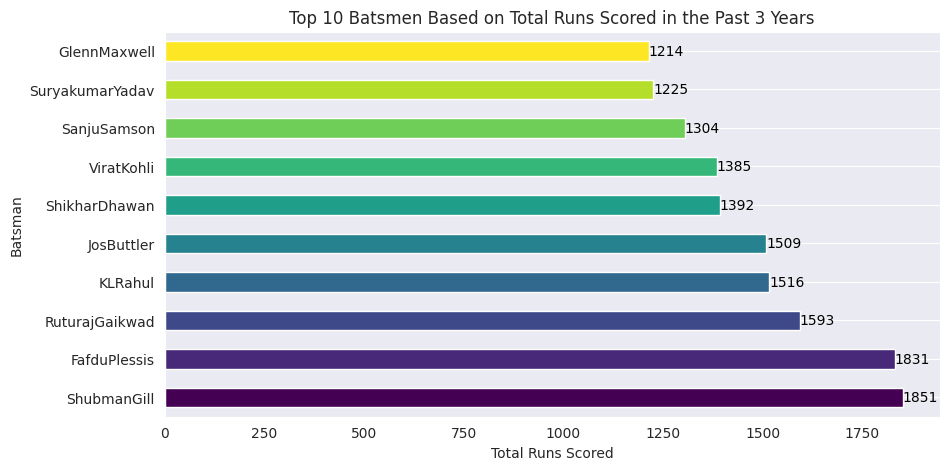

In [386]:
# Plot horizontal bar graph
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_batsman_total_runs)))
bars = top_10_batsman_total_runs.plot(kind='barh', color=colors)
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen Based on Total Runs Scored in the Past 3 Years')
plt.grid(axis='x')
# Add total runs scored as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}',
             va='center', ha='left', color='black')
plt.show()

#Top 10 batsmen based on past 3 years batting average.(min 60 balls faced in each season)

#Case 1: Batting Average when Batsman is not out

In [ ]:
# Group data by batsman name and calculate total runs scored and total balls faced
total_runs = df_batting_summary.groupby('batsmanName')['runs'].sum()
total_balls = df_batting_summary.groupby('batsmanName')['balls'].sum()
# Calculate batting average for each batsman (runs scored / number of times not out)
batting_average_not_out = total_runs / df_batting_summary[df_batting_summary['out/not_out'] == 'not_out'].groupby('batsmanName').size()
# Sort batsmen based on batting average
top_10_batsmen = batting_average_not_out.sort_values(ascending=False).head(10)


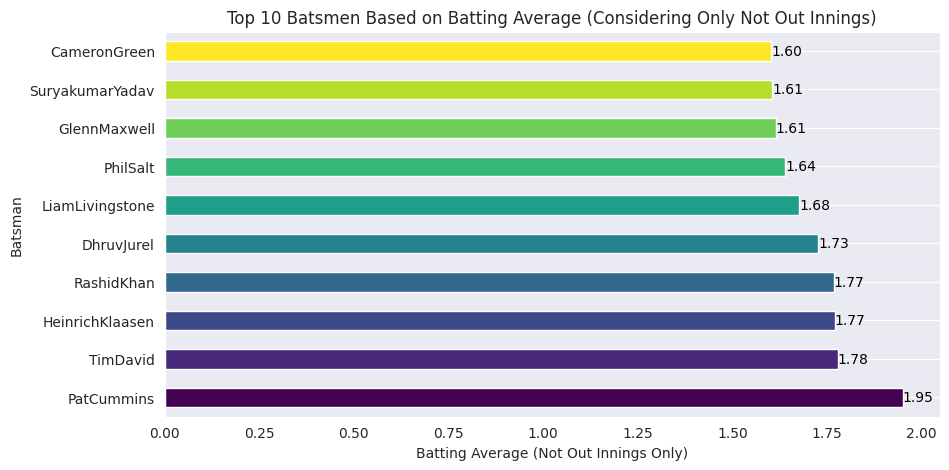

In [385]:
# Plot horizontal bar graph
plt.figure(figsize=(10,5))
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_batsmen)))
bars = top_10_batsmen.plot(kind='barh', color=colors)
plt.xlabel('Batting Average (Not Out Innings Only)')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen Based on Batting Average (Considering Only Not Out Innings)')
plt.grid(axis='x')
# Add batting average as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
plt.show()

In [304]:
# Group data by batsman name and calculate total runs scored and total balls faced
total_runs = df_batting_summary.groupby('batsmanName')['runs'].sum()
total_balls = df_batting_summary.groupby('batsmanName')['balls'].sum()
# Calculate batting average for each batsman (runs scored / number of times  out)
batting_average_out = total_runs / df_batting_summary[df_batting_summary['out/not_out'] == 'out'].groupby('batsmanName').size()
# Sort batsmen based on batting average
top_10_batsmen = batting_average_out.sort_values(ascending=False).head(10)


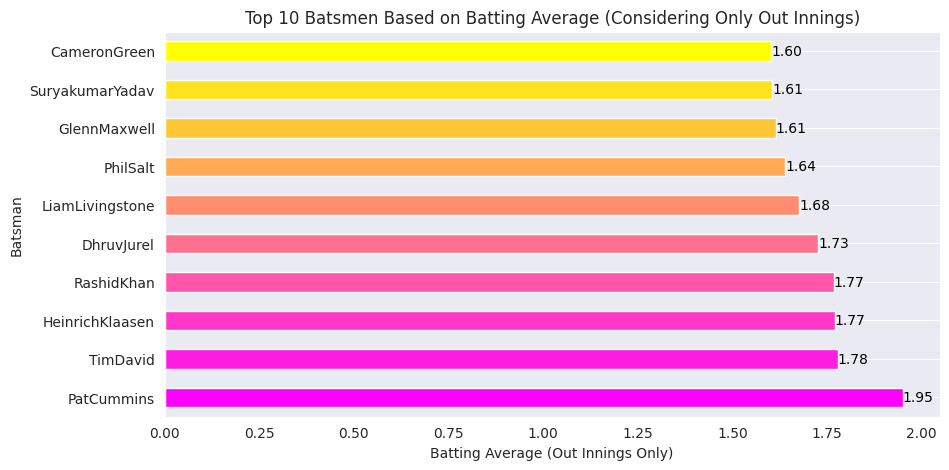

In [384]:
# Plot horizontal bar graph
plt.figure(figsize=(10,5))
colors = plt.cm.spring(np.linspace(0, 1, len(top_10_batsmen)))  # Using spring colormap
bars = top_10_batsmen.plot(kind='barh', color=colors)
plt.xlabel('Batting Average (Out Innings Only)')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen Based on Batting Average (Considering Only Out Innings)')
plt.grid(axis='x')
# Add batting average as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
plt.show()

#Case 3 When Batsman faced min 60 balls

In [383]:
# Group data by batsman name and calculate total runs scored and total balls faced
total_runs = df_batting_summary.groupby('batsmanName')['runs'].sum()
total_balls = df_batting_summary.groupby('batsmanName')['balls'].sum()
# Calculate batting average for each batsman (runs scored / balls faced)
batting_average = total_runs / total_balls
# Filter batsmen who have faced less than 60 balls in each season
batsmen_above_threshold = batting_average[total_balls >= 60]
# Sort batsmen based on batting average
top_10_batsmen = batsmen_above_threshold.sort_values(ascending=False).head(10)

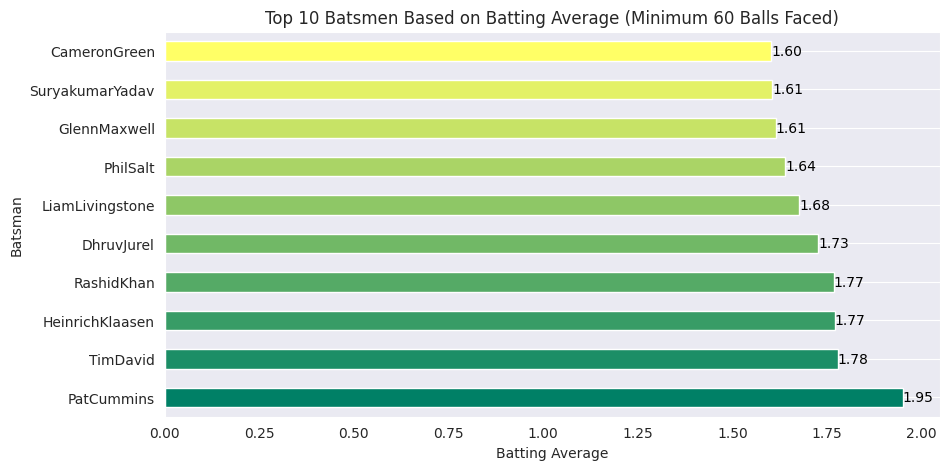

In [382]:
plt.figure(figsize=(10,5))
colors = plt.cm.summer(np.linspace(0, 1, len(top_10_batsmen)))  # Using summer colormap
bars = top_10_batsmen.plot(kind='barh', color=colors)
plt.xlabel('Batting Average')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen Based on Batting Average (Minimum 60 Balls Faced)')
plt.grid(axis='x')s
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
plt.show()

#Task-3Top 10 batsmen based on past 3 years strike rate (min 60 balls faced in each season)

In [306]:
total_runs = df_batting_summary.groupby('batsmanName')['runs'].sum()
total_balls = df_batting_summary.groupby('batsmanName')['balls'].sum()
batsmen_above_threshold = total_balls[total_balls >= 60]
strike_rate = (total_runs / total_balls) * 100
strike_rate_filtered = strike_rate.loc[batsmen_above_threshold.index]
top_10_batsmen_strike_rate = strike_rate_filtered.sort_values(ascending=False).head(10)

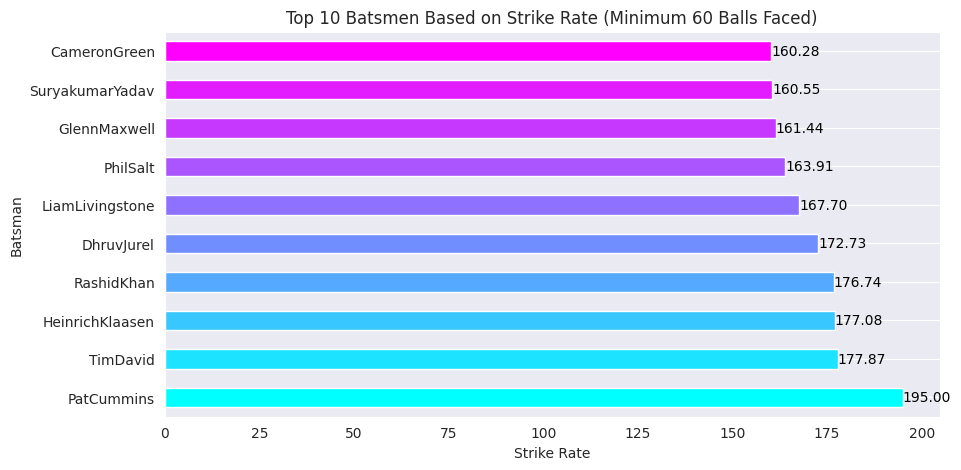

In [379]:
plt.figure(figsize=(10,5))
colors = plt.cm.cool(np.linspace(0, 1, len(top_10_batsmen_strike_rate)))  # Using cool colormap
bars = top_10_batsmen_strike_rate.plot(kind='barh', color=colors)
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen Based on Strike Rate (Minimum 60 Balls Faced)')
plt.grid(axis='x')
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
plt.show()

#Top 10 bowlers based on past 3 years total wickets taken.

In [307]:
# Group data by bowler name and calculate total wickets taken
total_wickets = df_bowling_summary.groupby('bowlerName')['wickets'].sum()
# Sort bowlers based on total wickets taken
top_10_bowlers = total_wickets.sort_values(ascending=False).head(10)

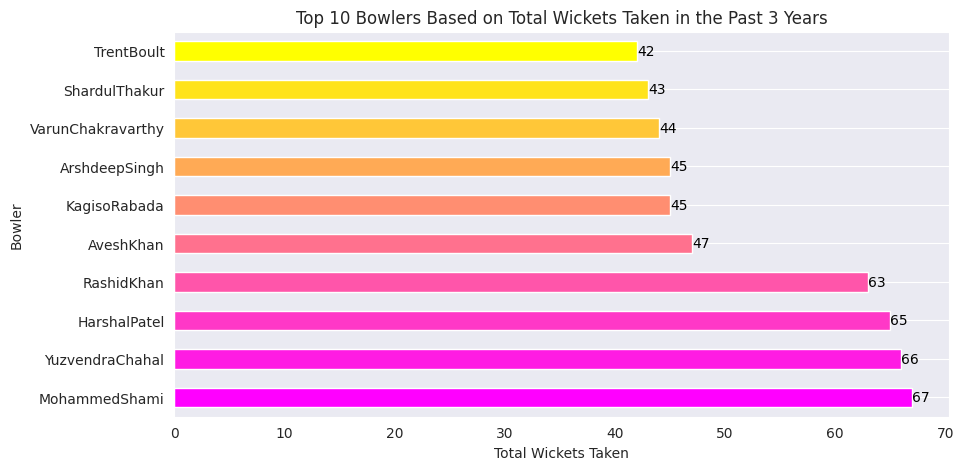

In [377]:
# Plot horizontal bar graph
plt.figure(figsize=(10,5))
colors = plt.cm.spring(np.linspace(0, 1, len(top_10_bowlers)))  # Using spring colormap
bars = top_10_bowlers.plot(kind='barh', color=colors)
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers Based on Total Wickets Taken in the Past 3 Years')
plt.grid(axis='x')
# Add total wickets as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):d}',
             va='center', ha='left', color='black')
plt.show()

#Top 10 bowlers based on past 3 years bowling average. (min 60 balls bowled in each season)


Group the data by bowler name and calculate the total number of wickets and total runs conceded by each bowler.
Calculate the bowling average for each bowler (total runs conceded / total wickets taken).
Filter out the bowlers who have bowled less than 60 balls in each season.
Sort the remaining bowlers based on their bowling averages.
Select the top 10 bowlers.

In [34]:
df_bowling_summary['balls']=df_bowling_summary['overs']*6

In [36]:
total_bowls=df_bowling_summary.groupby("bowlerName")['balls'].sum()

In [37]:
top_10_bowlers_max_balls=total_bowls.sort_values(ascending=False).head(10)

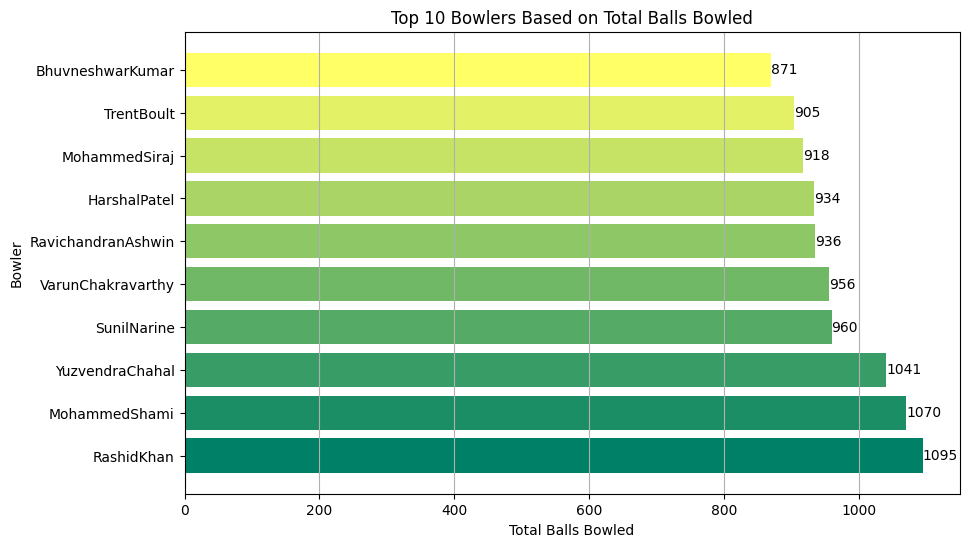

In [38]:
# Plot horizontal bar graph
plt.figure(figsize=(10,5))
colors = plt.cm.summer(np.linspace(0, 1, len(top_10_bowlers_max_balls)))  # Using summer colormap
bars = plt.barh(top_10_bowlers_max_balls.index, top_10_bowlers_max_balls.values, color=colors)
plt.xlabel('Total Balls Bowled')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers Based on Total Balls Bowled')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.0f}',
             va='center', ha='left', color='black')
# Show plot
plt.show()

In [308]:
# Group data by bowler name and calculate total balls bowled by each bowler
total_balls_bowled = df_bowling_summary.groupby('bowlerName')['balls'].sum()
# Filter out bowlers who have bowled less than 60 balls in each season
bowlers_above_threshold = total_balls_bowled[total_balls_bowled >= 60]
# Group data by bowler name and calculate total runs conceded and total wickets taken
total_runs_conceded = df_bowling_summary.groupby('bowlerName')['runs'].sum()
total_wickets = df_bowling_summary.groupby('bowlerName')['wickets'].sum()
# Calculate bowling average for each bowler (total runs conceded / total wickets taken)
bowling_average = total_runs_conceded / total_wickets
# Select bowling average for bowlers who have bowled at least 60 balls in each season
bowling_average_filtered = bowling_average.loc[bowlers_above_threshold.index]
# Sort bowlers based on bowling average
top_10_bowlers_bowling_average = bowling_average_filtered.sort_values(ascending=False).head(10)

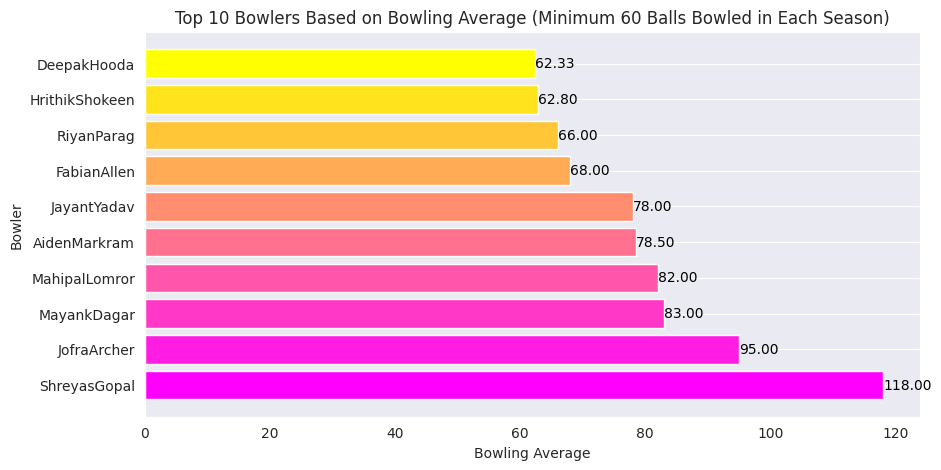

In [376]:
# Plot horizontal bar graph
plt.figure(figsize=(10,5))
colors = plt.cm.spring(np.linspace(0, 1, len(top_10_bowlers_bowling_average)))  # Using spring colormap
bars = plt.barh(top_10_bowlers_bowling_average.index, top_10_bowlers_bowling_average.values, color=colors)
plt.xlabel('Bowling Average')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers Based on Bowling Average (Minimum 60 Balls Bowled in Each Season)')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
# Show plot
plt.show()

In [309]:
total_balls_bowled = df_bowling_summary.groupby('bowlerName')['balls'].sum()
total_runs_conceded = df_bowling_summary.groupby('bowlerName')['runs'].sum()
# Calculate total overs bowled by each bowler
total_overs_bowled = total_balls_bowled / 6  # Assuming 6 balls per over
# Calculate economy rate for each bowler (total runs conceded / total overs bowled)
economy_rate = total_runs_conceded / total_overs_bowled
# Filter bowlers who have bowled less than 60 balls in each season
bowlers_above_threshold = total_balls_bowled[total_balls_bowled >= 60]
# Select economy rate for bowlers who have bowled at least 60 balls in each season
economy_rate_filtered = economy_rate.loc[bowlers_above_threshold.index]
# Sort bowlers based on economy rate
top_10_bowlers_economy_rate = economy_rate_filtered.sort_values(ascending=False).head(10)

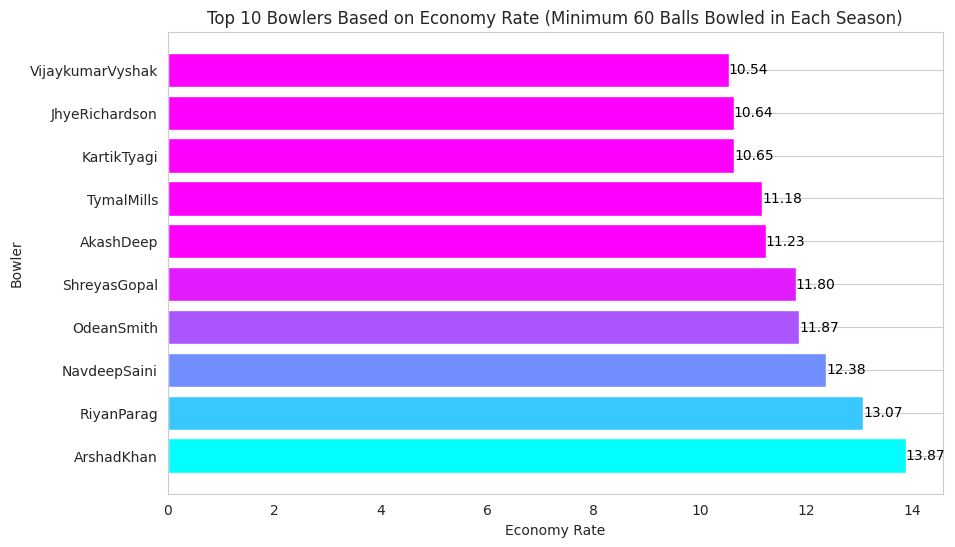

In [247]:
# Plot horizontal bar graph
plt.figure(figsize=(10, 6))
colors = plt.cm.cool(np.linspace(0, 2, len(top_10_bowlers_economy_rate)))  # Using summer colormap
bars = plt.barh(top_10_bowlers_economy_rate.index, top_10_bowlers_economy_rate.values, color=colors)
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers Based on Economy Rate (Minimum 60 Balls Bowled in Each Season)')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
# Show plot
plt.show()

#Top 5 batsmen based on past 3 years boundary % (fours and sixes).

The boundary percentage of a batsman in cricket reflects the percentage of runs they score through boundaries (fours and sixes) compared to their total runs scored. Here's how to calculate it:

Formula: Boundary Percentage = (Total Fours + Total Sixes) / Total Runs Scored * 100

Steps:

Gather Data: You'll need information on:
Total Runs Scored by the batsman (for a specific innings or overall career)
Number of Fours scored by the batsman
Number of Sixes scored by the batsman

In [46]:
# Group data by batsman name and calculate total number of fours and sixes hit by each batsman
total_fours = df_batting_summary.groupby('batsmanName')['4s'].sum()
total_sixes = df_batting_summary.groupby('batsmanName')['6s'].sum()
total_runs = df_batting_summary.groupby('batsmanName')['runs'].sum()

In [47]:
boundary_percentage = ((total_fours + total_sixes) / total_runs) * 100

In [310]:
# Sort batsmen based on boundary percentage
top_10_batsmen_boundary_percentage = boundary_percentage.sort_values(ascending=False).head(10)

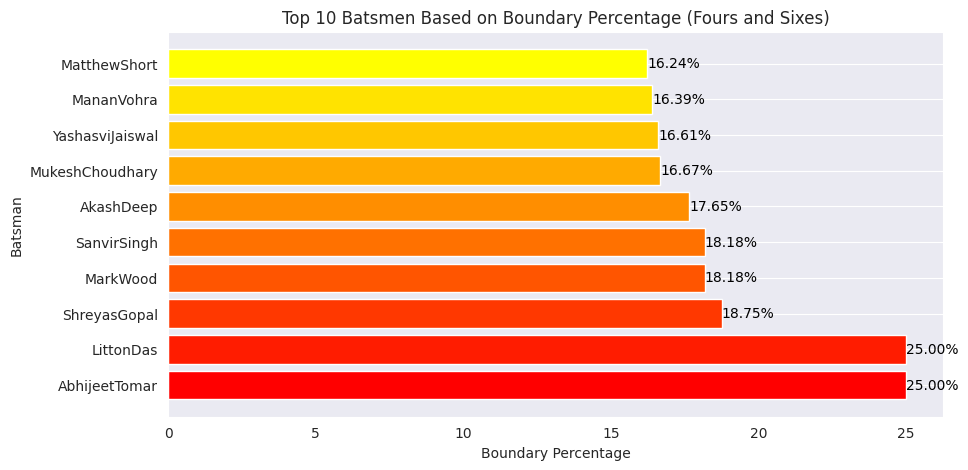

In [375]:
# Plot horizontal bar graph
plt.figure(figsize=(10, 5))
colors = plt.cm.autumn(np.linspace(0, 1, len(top_10_batsmen_boundary_percentage)))  # Using autumn colormap
bars = plt.barh(top_10_batsmen_boundary_percentage.index, top_10_batsmen_boundary_percentage.values, color=colors)
plt.xlabel('Boundary Percentage')
plt.ylabel('Batsman')
plt.title('Top 10 Batsmen Based on Boundary Percentage (Fours and Sixes)')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
             va='center', ha='left', color='black')
# Show plot
plt.show()

#Top 10 bowlers based on past 3 years dot ball %.

In [52]:
dot_balls = df_bowling_summary.groupby('bowlerName')['0s'].sum()
total_balls=df_bowling_summary.groupby('bowlerName')['balls'].sum()

In [ ]:
# Calculate dot ball percentage for each bowler
dot_ball_percentage = (dot_balls / total_balls) * 100
# Sort bowlers based on dot ball percentage
top_10_bowlers_dot_ball_percentage = dot_ball_percentage.sort_values(ascending=False).head(10)

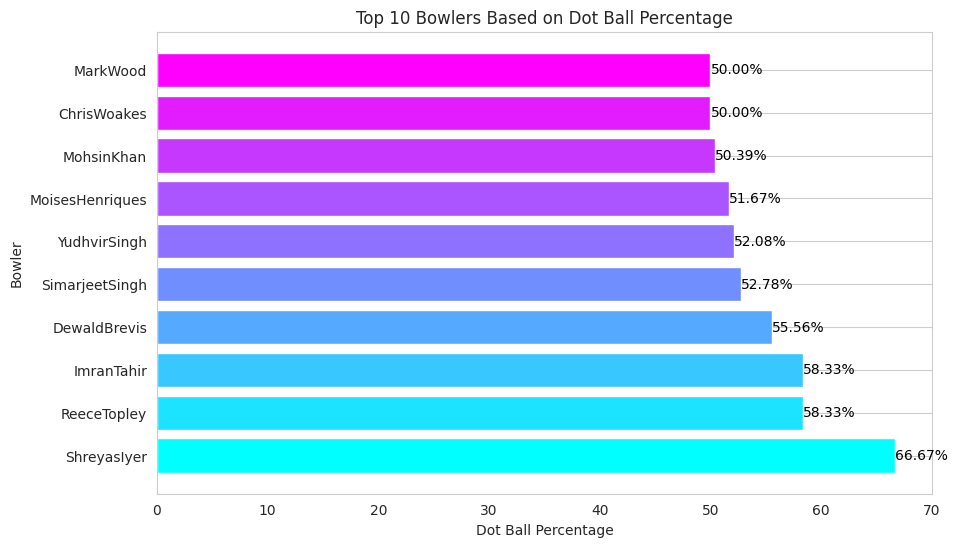

In [248]:
# Plot horizontal bar graph
plt.figure(figsize=(10, 6))
colors = plt.cm.cool(np.linspace(0, 1, len(top_10_bowlers_dot_ball_percentage)))  # Using spring colormap
bars = plt.barh(top_10_bowlers_dot_ball_percentage.index, top_10_bowlers_dot_ball_percentage.values, color=colors)
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Bowler')
plt.title('Top 10 Bowlers Based on Dot Ball Percentage')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
             va='center', ha='left', color='black')
# Show plot
plt.show()

#Top 4 teams based on past 3 years winning %.

In [57]:
# Group data by team name and count the number of matches won by each team
matches_won = df_match_summary.groupby('winner').size()
# Calculate total number of matches played by each team
total_matches_played = df_match_summary.groupby('team1').size() + df_match_summary.groupby('team2').size()
# Calculate winning percentage for each team
winning_percentage = (matches_won / total_matches_played) * 100
# Sort teams based on winning percentage
top_4_teams_winning_percentage = winning_percentage.sort_values(ascending=False).head(4)
# Display the top 4 teams based on winning percentage
print(top_4_teams_winning_percentage)

winner
Titans          69.696970
Super Giants    58.620690
RCB             55.555556
Super Kings     55.555556
dtype: float64


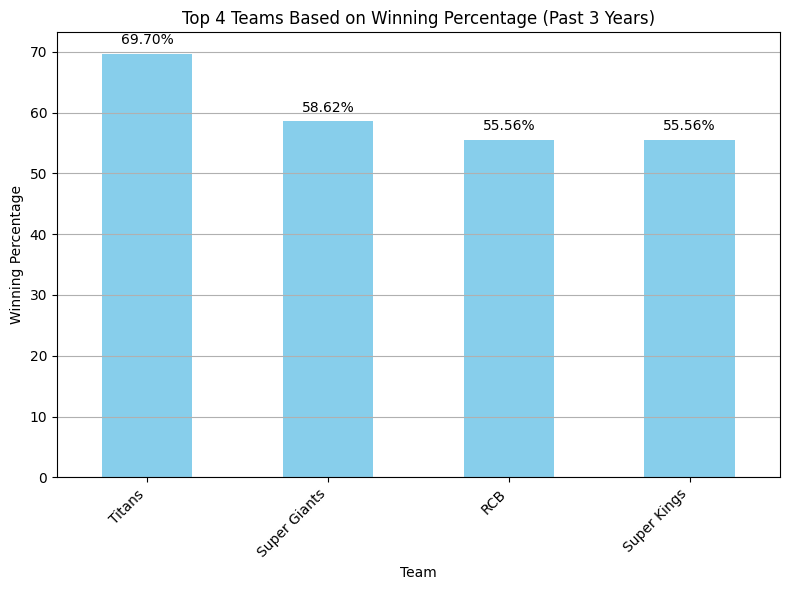

In [58]:
# Plot bar graph
plt.figure(figsize=(8, 6))
top_4_teams_winning_percentage.plot(kind='bar', color='skyblue')
plt.xlabel('Team')
plt.ylabel('Winning Percentage')
plt.title('Top 4 Teams Based on Winning Percentage (Past 3 Years)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
# Add percentage values on top of the bars
for index, value in enumerate(top_4_teams_winning_percentage):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')
# Show plot
plt.tight_layout()
plt.show()

#Top 2 teams with the highest number of wins achieved by chasing targets over the past 3 years.

In [311]:
# Select matches where the winner is the team that chased the target
chasing_wins = df_match_summary[df_match_summary['team1'] == df_match_summary['winner']]

# Group data by the winning team and count the number of matches won by each team
chasing_wins_count = chasing_wins.groupby('winner').size()

# Sort teams based on the number of matches won while chasing
top_2_teams_chasing_wins = chasing_wins_count.sort_values(ascending=False).head(2)

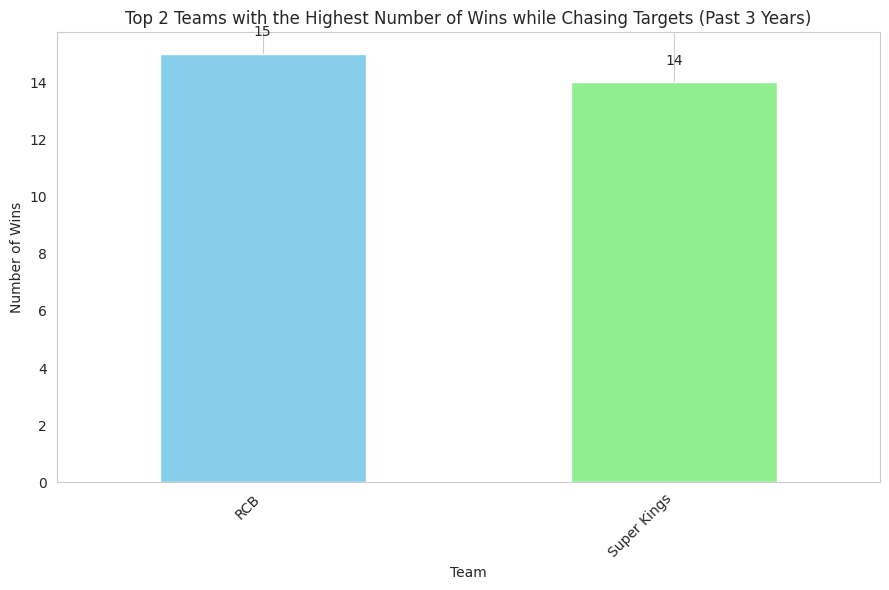

In [312]:
# Plot bar graph
plt.figure(figsize=(9, 6))
top_2_teams_chasing_wins.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.title('Top 2 Teams with the Highest Number of Wins while Chasing Targets (Past 3 Years)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
# Add value labels on top of the bars
for index, value in enumerate(top_2_teams_chasing_wins):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')
# Show plot
plt.tight_layout()
plt.show()

#Secondry Analysis-Predict the following for the season 2024 using available data and by doing additional research

1.Orange and purple cap player

In cricket's Indian Premier League (IPL), the Orange Cap and Purple Cap are awarded to the top performers in a particular season:

Orange Cap: Awarded to the player who scores the most runs throughout the season.

Purple Cap: Awarded to the player who takes the most wickets throughout the season.

These caps are not permanent awards. After each match, the leading run-scorer and wicket-taker are referred to as the "Orange Cap holder" and "Purple Cap holder" respectively. But, the official awards are presented at the end of the IPL season.

In [61]:
df_batsman_stats=df_batting_summary.copy()

In [ ]:
df_batsman_stats.head()

In [64]:
df_total_runs = df_batsman_stats.groupby('batsmanName', as_index=False)['runs'].sum()
df_total_runs = df_total_runs.rename(columns={'runs': 'total_runs'})

In [65]:
df_batsman_stats['SR'] = pd.to_numeric(df_batsman_stats['SR'], errors='coerce')
df_avg_sr = df_batsman_stats.groupby('batsmanName')['SR'].mean().reset_index()
df_avg_sr = df_avg_sr.rename(columns={'SR': 'avg_SR'})

In [66]:
df_total_balls = df_batsman_stats.groupby('batsmanName')['balls'].sum().reset_index()
df_total_balls = df_total_balls.rename(columns={'balls': 'total_balls_played'})

In [67]:
df_total_4s = df_batsman_stats.groupby('batsmanName')['4s'].sum().reset_index()
df_total_4s = df_total_4s.rename(columns={'4s': 'total_4s'})

In [68]:
df_total_6s = df_batsman_stats.groupby('batsmanName')['6s'].sum().reset_index()
df_total_6s = df_total_6s.rename(columns={'6s': 'total_6s'})

In [69]:
df_total_matches = df_batsman_stats.groupby('batsmanName')['match_id'].size().reset_index()
df_total_matches = df_total_matches.rename(columns={'match_id': 'total_matches'})

In [70]:
df_total_out = df_batsman_stats[df_batsman_stats['out/not_out'] == 'out'].groupby('batsmanName').size().reset_index()
df_total_out = df_total_out.rename(columns={0: 'total_out'})

In [71]:
df_total_not_out = df_batsman_stats[df_batsman_stats['out/not_out'] == 'not_out'].groupby('batsmanName').size().reset_index()
df_total_not_out = df_total_not_out.rename(columns={0: 'total_not_out'})

In [72]:
df_orange=pd.merge(df_total_runs, df_avg_sr, on='batsmanName')

In [73]:
df_orange=pd.merge(df_total_balls,df_orange,on='batsmanName')

In [74]:
df_orange=pd.merge(df_total_4s,df_orange,on='batsmanName')

In [75]:
df_orange=pd.merge(df_total_6s,df_orange,on='batsmanName')

In [76]:
df_orange=pd.merge(df_total_matches,df_orange,on='batsmanName')

In [77]:
df_orange=pd.merge(df_total_out,df_orange,on='batsmanName')

In [78]:
df_orange=pd.merge(df_total_not_out,df_orange,on='batsmanName')

In [ ]:
df_orange

<ipython-input-374-cbd6a3e052a0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_orange.corr()


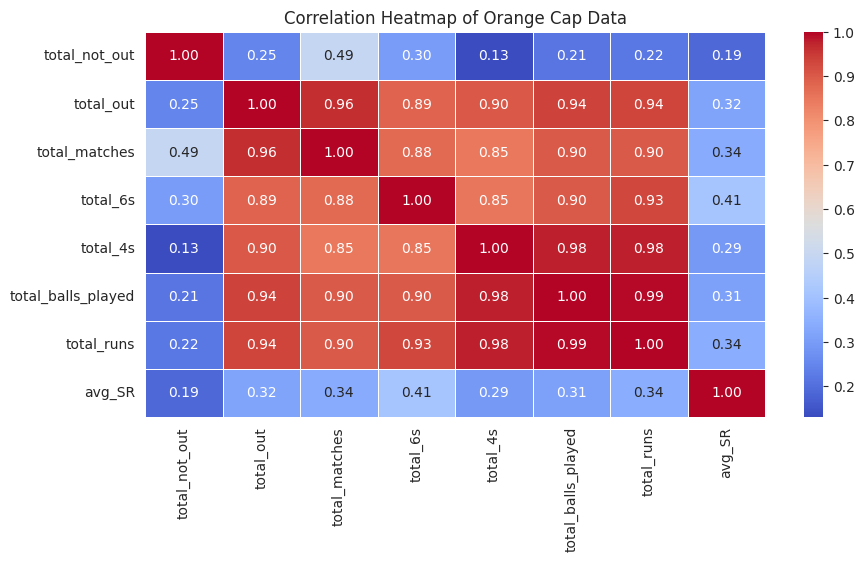

In [374]:
corr_matrix = df_orange.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Orange Cap Data')
plt.show()

In [83]:
df_batting_summary['Date'] = pd.to_datetime(df_batting_summary['Date'])
df_batting_summary['Year'] = df_batting_summary['Date'].dt.year

In [84]:
df_batting_summary['Season'] = 'IPL-' + df_batting_summary['Year'].astype(str)

In [85]:
df_batting_summary=df_batting_summary.drop('Year',axis=1)

In [87]:
df_batting_group = df_batting_summary.groupby([df_batting_summary['Season'], df_batting_summary['batsmanName']])['runs'].sum().reset_index()

In [89]:
df_batting_group = df_batting_group[df_batting_group['Season'] != 'IPL-2029']

# Now you can check the value counts
print(df_batting_group['Season'].value_counts())

IPL-2023    176
IPL-2022    174
IPL-2021    151
Name: Season, dtype: int64


In [313]:
# Group the data by 'batsmanName' and count the number of unique seasons each batsman played in
batsman_season_counts = df_batting_group.groupby('batsmanName')['Season'].nunique()

# Filter out the batsmen who played in all seasons
common_batsmen = batsman_season_counts[batsman_season_counts == df_batting_group['Season'].nunique()].index.tolist()

In [314]:
# Group the data by 'Season' and sort within each group by runs in descending order
top_batsmen_by_season = df_batting_group.groupby('Season').apply(lambda x: x.nlargest(10, 'runs')).reset_index(drop=True)

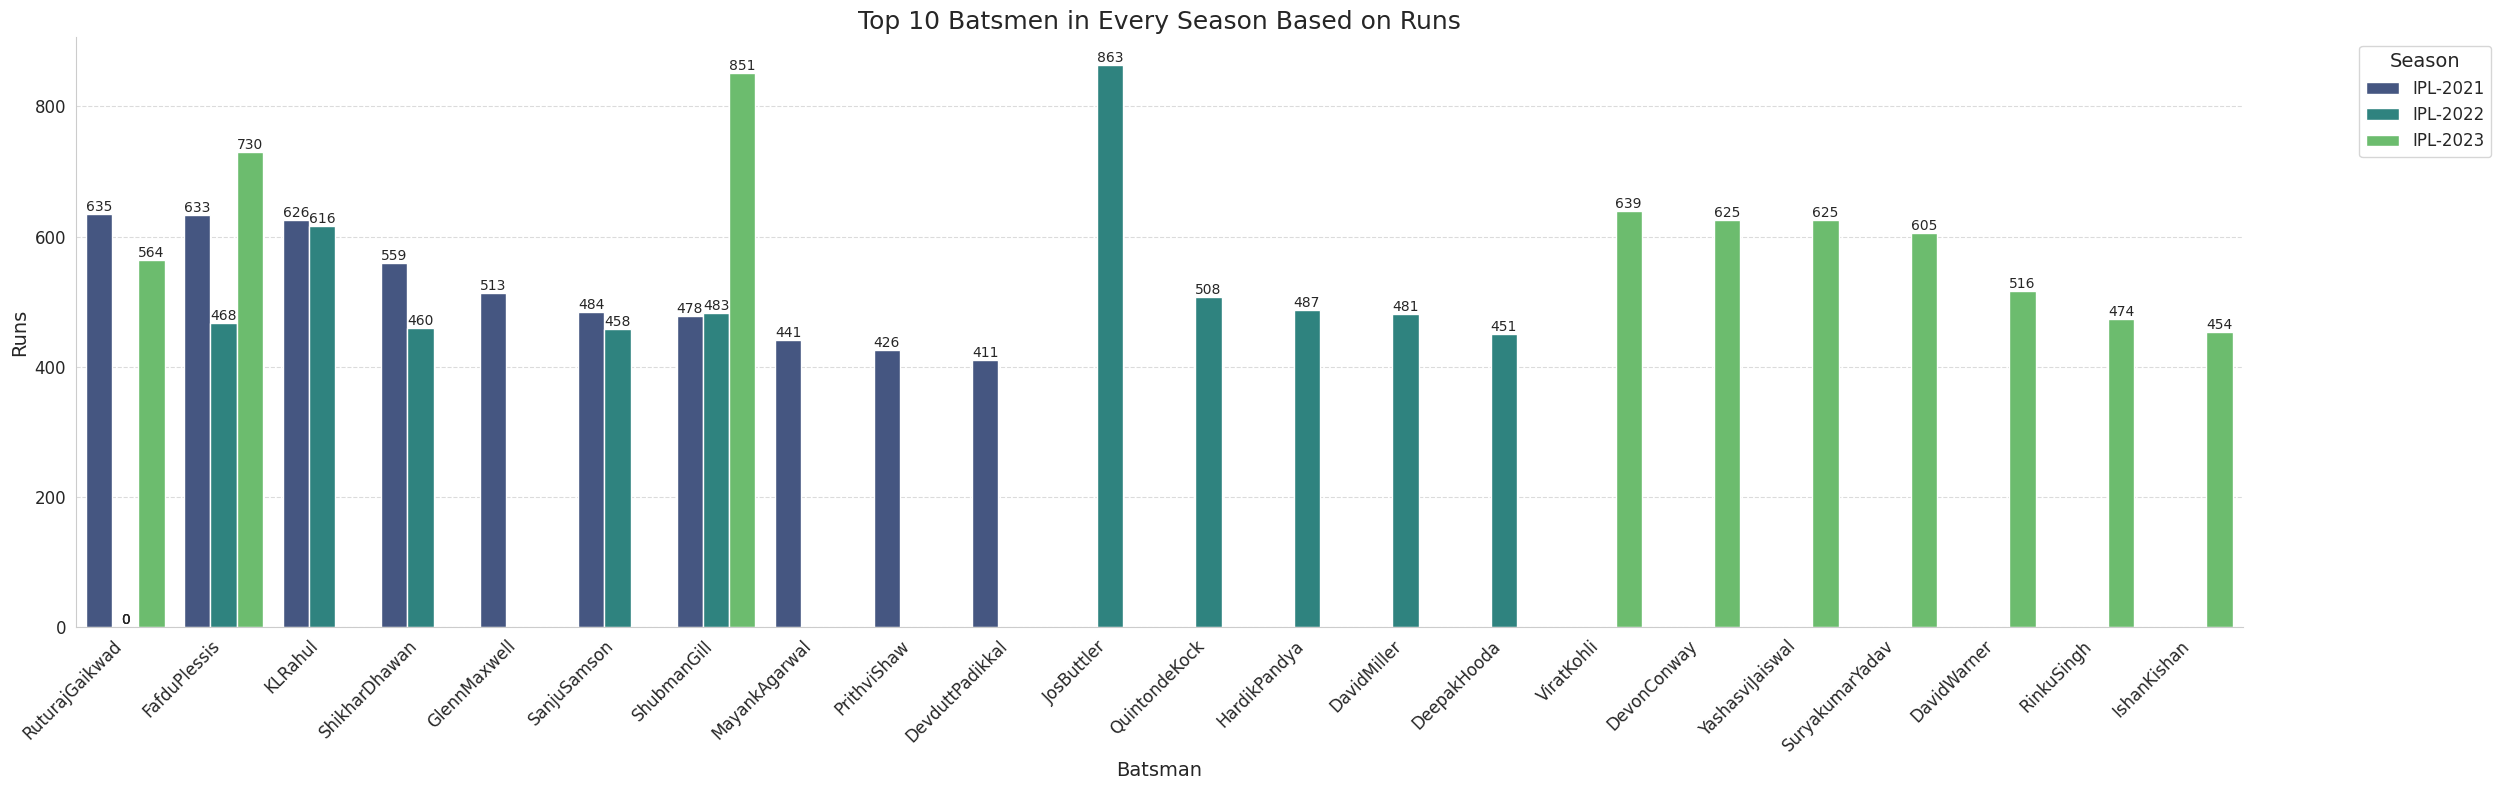

In [95]:
sns.set_style("whitegrid")
# Create the plot
plt.figure(figsize=(25, 8))
# Plot the data
sns.barplot(x='batsmanName', y='runs', hue='Season', data=top_batsmen_by_season, palette='viridis')
# Adjust labels and title
plt.title('Top 10 Batsmen in Every Season Based on Runs', fontsize=18)
plt.xlabel('Batsman', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
# Display the legend
plt.legend(title='Season', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
# Show plot
plt.tight_layout()
plt.show()

In [ ]:
# Filter the DataFrame to include data only for seasons IPL-2021 to IPL-2023
filtered_df = df_batting_group[df_batting_group['Season'].isin(['IPL-2021', 'IPL-2022', 'IPL-2023'])]
# Group the filtered data by 'batsmanName' and 'Season' and calculate the average runs scored by each batsman per season
batsman_performance = filtered_df.groupby(['batsmanName', 'Season'])['runs'].mean().unstack()
# Fill missing values (if any) with 0
batsman_performance = batsman_performance.fillna(0)
# Calculate the average runs per season for each batsman
batsman_performance['Average_Runs_IPL_2021'] = batsman_performance['IPL-2021']
batsman_performance['Average_Runs_IPL_2022'] = batsman_performance['IPL-2022']
batsman_performance['Average_Runs_IPL_2023'] = batsman_performance['IPL-2023']
# Drop unnecessary columns
batsman_performance = batsman_performance[['Average_Runs_IPL_2021', 'Average_Runs_IPL_2022', 'Average_Runs_IPL_2023']]
# Compare the average runs per season for each batsman
batsman_performance['Improvement_from_2022_to_2023'] = batsman_performance['Average_Runs_IPL_2023'] - batsman_performance['Average_Runs_IPL_2022']
batsman_performance['Improvement_from_2021_to_2022'] = batsman_performance['Average_Runs_IPL_2022'] - batsman_performance['Average_Runs_IPL_2021']

In [98]:
# Sort the DataFrame by the improvement in performance from IPL-2021 to IPL-2023
top_improvements = batsman_performance.sort_values(by='Improvement_from_2021_to_2022', ascending=False)
# Select the top 3 batsmen who made the most improvement
top_3_batsmen_2021_2022 = top_improvements.head(3)

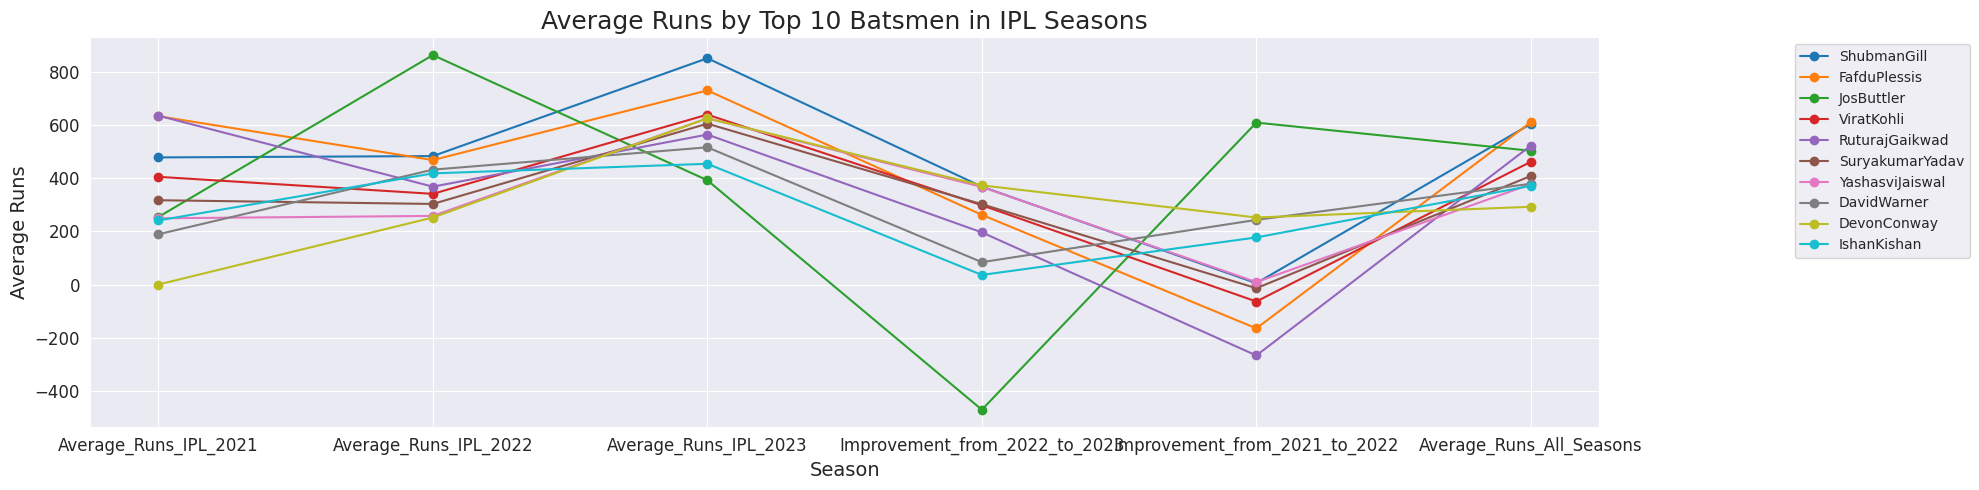

In [373]:
# Select the top 10 batsmen based on average runs across IPL seasons
top_10_batsmen = batsman_performance.mean(axis=1).nlargest(10).index
# Filter batsman_performance to include only the top 10 batsmen
batsman_performance_filtered = batsman_performance.loc[top_10_batsmen]
# Plotting
plt.figure(figsize=(20,5))
# Plot average runs for each batsman in every season
for batsman in batsman_performance_filtered.index:
    plt.plot(batsman_performance_filtered.columns, batsman_performance_filtered.loc[batsman], marker='o', label=batsman)
# Add labels and title
plt.title('Average Runs by Top 10 Batsmen in IPL Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10, bbox_to_anchor=(1.25, 1))
# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [100]:
# Calculate the average runs for each player across all three seasons
batsman_performance['Average_Runs_All_Seasons'] = batsman_performance[['Average_Runs_IPL_2021', 'Average_Runs_IPL_2022', 'Average_Runs_IPL_2023']].mean(axis=1)

In [315]:
# Filter the DataFrame to include only players who played in every season
players_in_every_season = batsman_performance[(batsman_performance['Average_Runs_IPL_2021'] > 0) &
                                              (batsman_performance['Average_Runs_IPL_2022'] > 0) &
                                              (batsman_performance['Average_Runs_IPL_2023'] > 0)]

<ipython-input-317-f06bc793f26d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_players.index, y='Average_Runs_All_Seasons', data=top_5_players, palette='viridis')


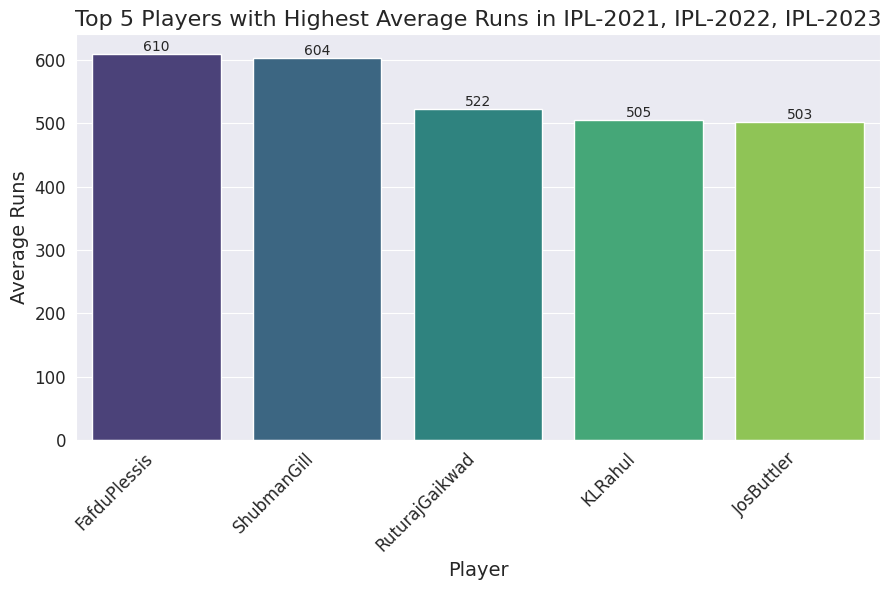

In [317]:
# Set seaborn style
sns.set_style("darkgrid")
# Your code for creating the plot goes here
top_5_players = players_in_every_season.sort_values(by='Average_Runs_All_Seasons', ascending=False).head(5)
plt.figure(figsize=(9, 6))
sns.barplot(x=top_5_players.index, y='Average_Runs_All_Seasons', data=top_5_players, palette='viridis')
plt.title('Top 5 Players with Highest Average Runs in IPL-2021, IPL-2022, IPL-2023', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Average Runs', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [321]:
players_in_every_season['Average_Improvement_All_Seasons']=(players_in_every_season['Improvement_from_2022_to_2023']+players_in_every_season['Improvement_from_2021_to_2022'])/2

<ipython-input-321-0d0c11b39c10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_in_every_season['Average_Improvement_All_Seasons']=(players_in_every_season['Improvement_from_2022_to_2023']+players_in_every_season['Improvement_from_2021_to_2022'])/2


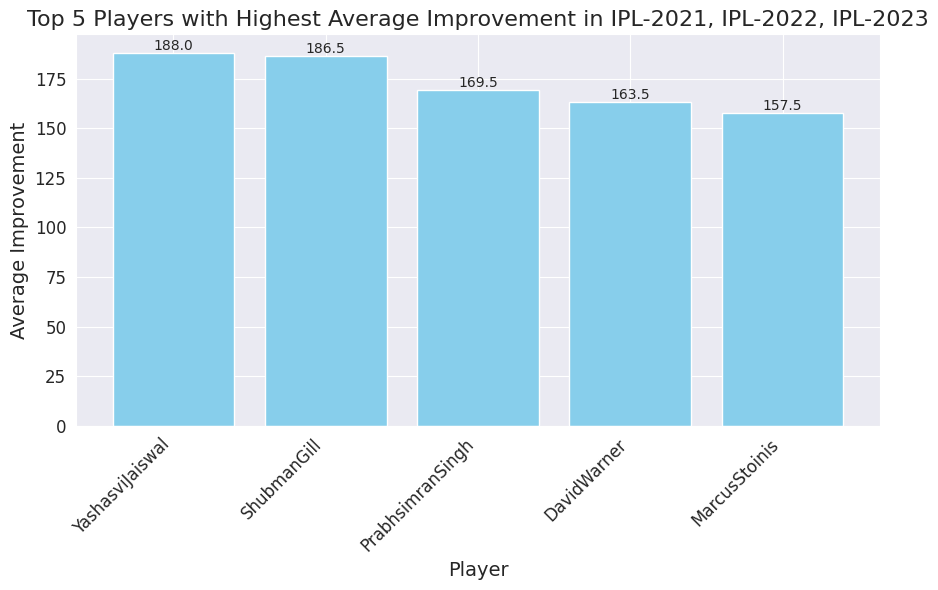

In [322]:
# Sort the DataFrame by average improvement across all seasons in descending order
top_5_players_improvement = players_in_every_season.sort_values(by='Average_Improvement_All_Seasons', ascending=False).head(5)
# Plotting
plt.figure(figsize=(9, 6))
# Bar plot for top 5 players
bars = plt.bar(top_5_players_improvement.index, top_5_players_improvement['Average_Improvement_All_Seasons'], color='skyblue')
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
# Add labels and title
plt.title('Top 5 Players with Highest Average Improvement in IPL-2021, IPL-2022, IPL-2023', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Average Improvement', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Show plot
plt.tight_layout()
plt.show()

#As from above analysis #Shubham gill may be the orange cap player Because he is the common player in both the analysis.

In [107]:
#Here we will add Date column into (df_bowling_summary) from (df_match_summary) by taking match id as column as common
# Create a dictionary mapping match id to date from df_match_summary
match_id_to_date = df_match_summary.set_index('match_id')['matchDate'].to_dict()

In [108]:
# Add 'Date' column to df_batting_summary using match id as the key
df_bowling_summary['Date'] = df_batting_summary['match_id'].map(match_id_to_date)

In [110]:
#Replacing Date column with season
df_bowling_summary['Date'] = pd.to_datetime(df_bowling_summary['Date'])
df_bowling_summary['Year'] = df_bowling_summary['Date'].dt.year
df_bowling_summary['Season'] = 'IPL-' + df_bowling_summary['Year'].astype(str)

In [111]:
df_bowling_summary=df_bowling_summary.drop('Year',axis=1)

In [114]:
df_bowling_group = df_bowling_summary.groupby([df_bowling_summary['Season'], df_bowling_summary['bowlerName']])['wickets'].sum().reset_index()

In [115]:
df_bowling_group_2 = df_bowling_summary.groupby(df_bowling_summary['bowlerName'])['balls'].sum().reset_index()

In [116]:
df_bowling_group  = df_bowling_group.merge(df_bowling_group_2, on='bowlerName')

In [118]:
df_bowling_group = df_bowling_group[df_bowling_group['Season'] != 'IPL-2029']

# Now you can check the value counts
print(df_bowling_group['Season'].value_counts())

IPL-2022    165
IPL-2021    137
IPL-2023    106
Name: Season, dtype: int64


In [323]:
# Group the data by 'bowlerName' and count the number of unique seasons each bowler played in
bowler_season_counts = df_bowling_group.groupby('bowlerName')['Season'].nunique()
# Filter out the bowler who played in all seasons
common_bowler = bowler_season_counts[bowler_season_counts == df_bowling_group['Season'].nunique()].index.tolist()

In [324]:
# Group the data by 'Season' and sort within each group by runs in descending order
top_bowler_by_season = df_bowling_group.groupby('Season').apply(lambda x: x.nlargest(10, 'wickets')).reset_index(drop=True)

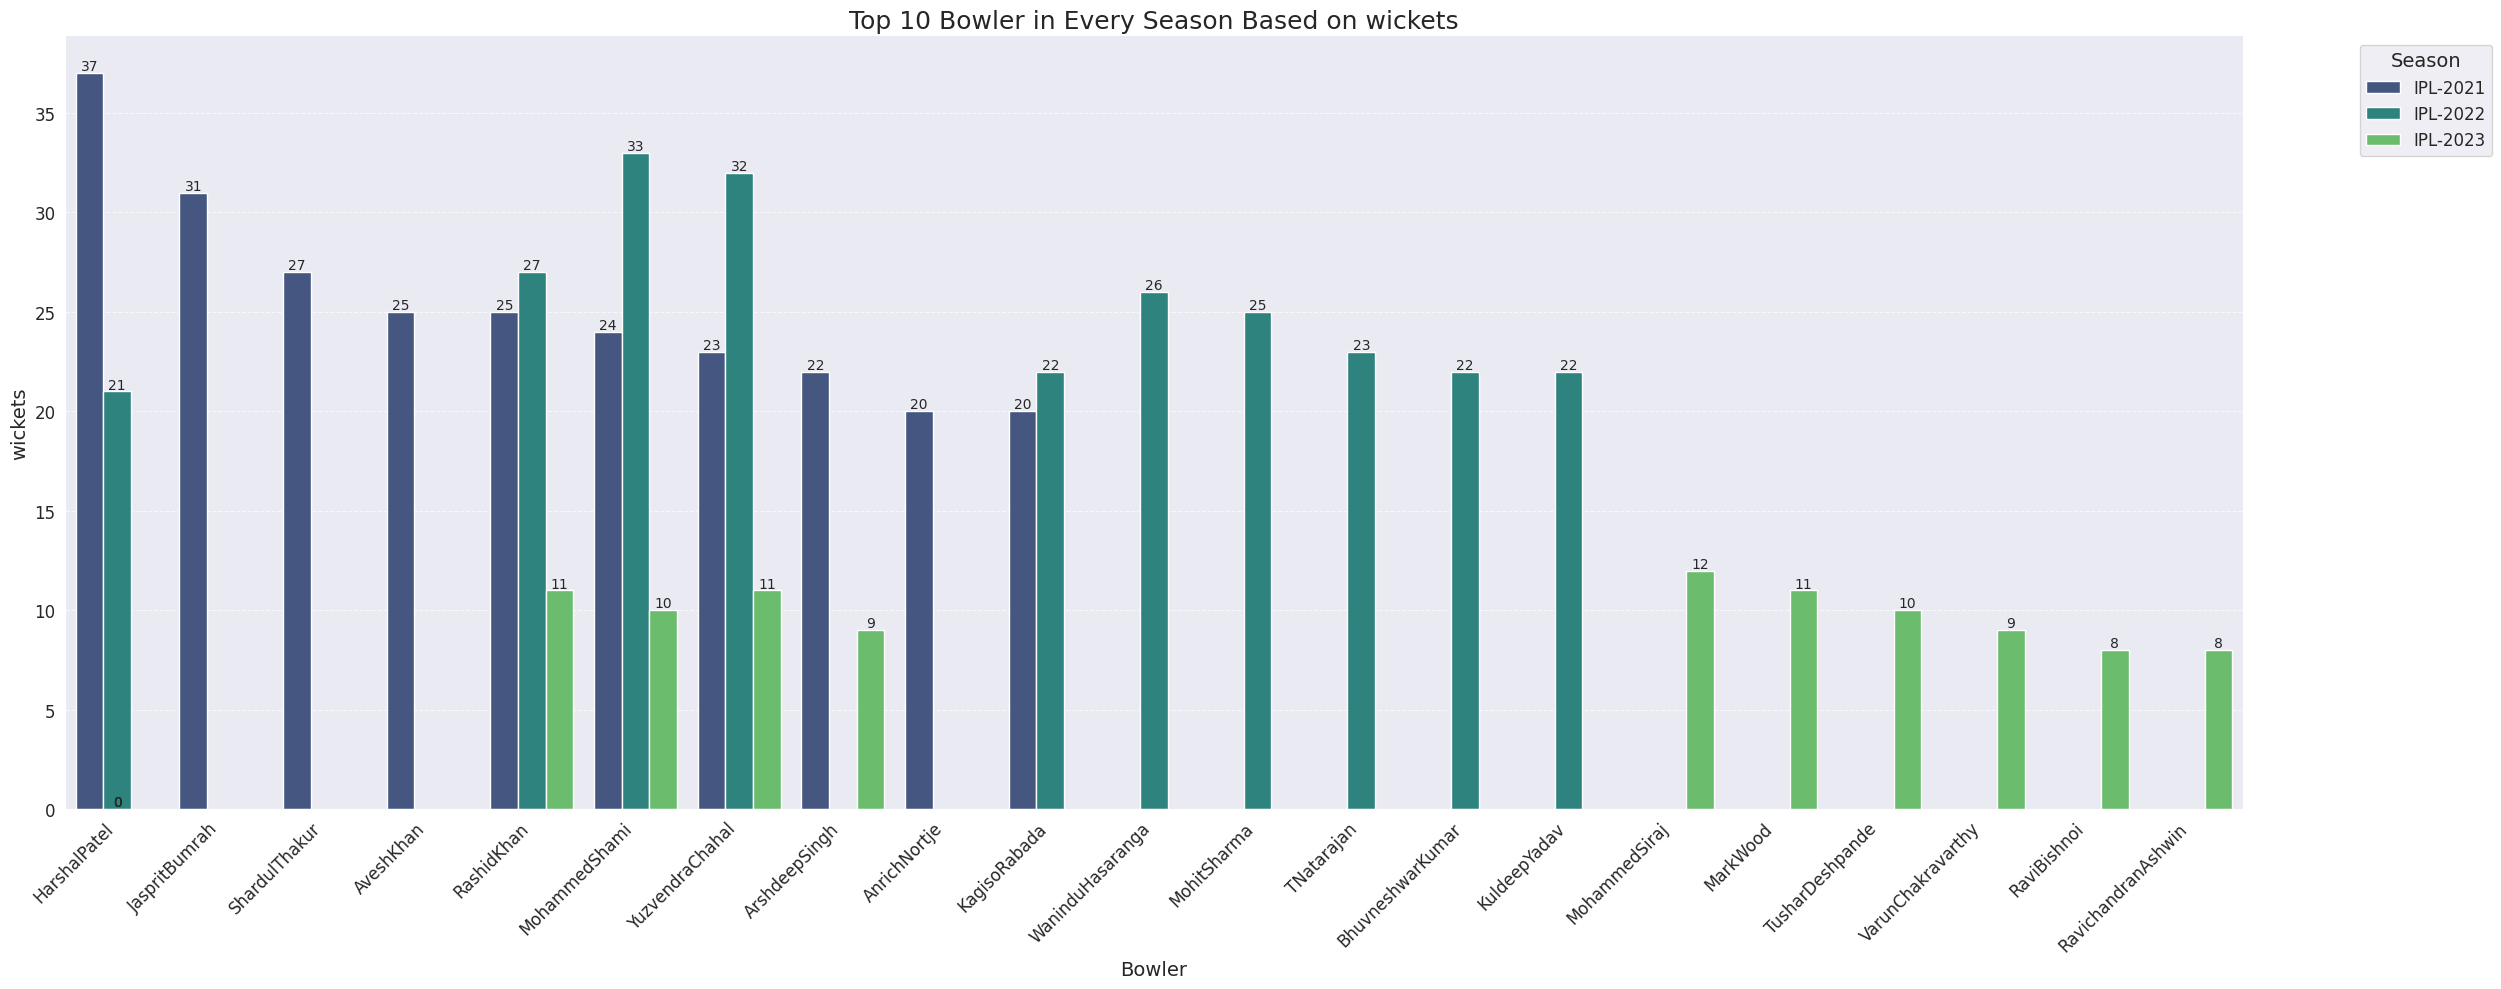

In [121]:
sns.set_style("dark")
# Create the plot
plt.figure(figsize=(25, 10))
# Plot the data
sns.barplot(x='bowlerName', y='wickets', hue='Season', data=top_bowler_by_season, palette='viridis')
# Adjust labels and title
plt.title('Top 10 Bowler in Every Season Based on wickets', fontsize=18)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('wickets', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Add data labels
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
# Display the legend
plt.legend(title='Season', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
# Show plot
plt.tight_layout()
plt.show()

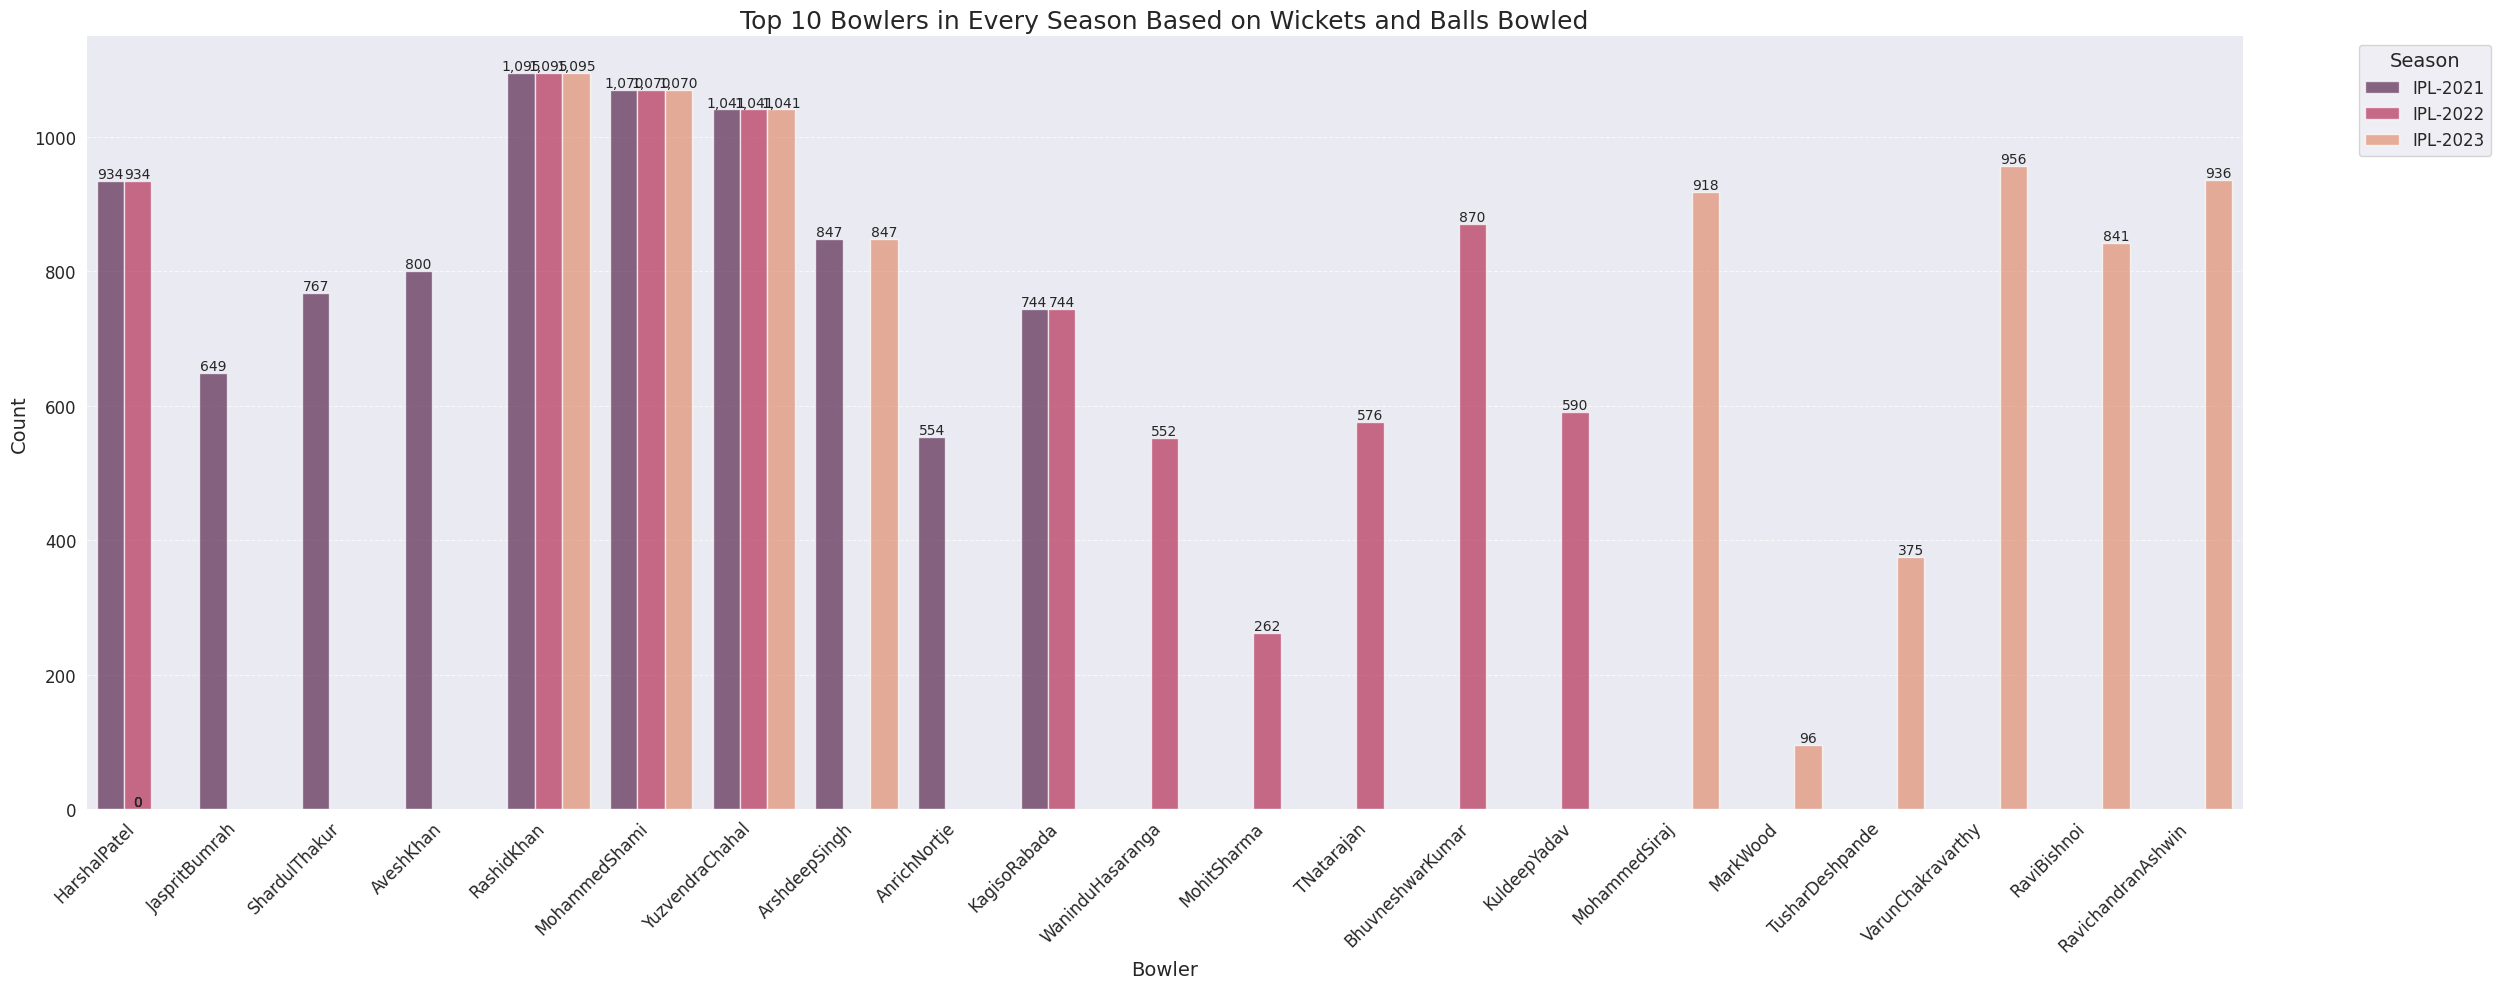

In [122]:
sns.set_style("dark")
# Create the plot
plt.figure(figsize=(25, 10))
# Plot the data
sns.barplot(x='bowlerName', y='balls', hue='Season', data=top_bowler_by_season, palette='rocket', alpha=0.7)
# Adjust labels and title
plt.title('Top 10 Bowlers in Every Season Based on Wickets and Balls Bowled', fontsize=18)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Add data labels for wickets
for p in plt.gca().patches[:len(top_bowler_by_season)*2]:
    plt.gca().annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
# Add data labels for balls bowled
for p in plt.gca().patches[len(top_bowler_by_season)*2:]:
    plt.gca().annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
# Display the legend
plt.legend(title='Season', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
# Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
# Show plot
plt.tight_layout()
plt.show()

In [325]:
# Filter the DataFrame to include data only for seasons IPL-2021 to IPL-2023
filtered_df = df_bowling_group[df_bowling_group['Season'].isin(['IPL-2021', 'IPL-2022', 'IPL-2023'])]
# Group the filtered data by 'bowlerName' and 'Season' and calculate the average runs scored by each batsman per season
bowler_performance = filtered_df.groupby(['bowlerName', 'Season'])['wickets'].sum().unstack()
# Fill missing values (if any) with 0
bowler_performance = bowler_performance.fillna(0)
# Calculate the average runs per season for each batsman
bowler_performance['Wickets_IPL_2021'] = bowler_performance['IPL-2021']
bowler_performance['Wickets_IPL_2022'] = bowler_performance['IPL-2022']
bowler_performance['Wickets_IPL_2023'] = bowler_performance['IPL-2023']
# Drop unnecessary columns
bowler_performance = bowler_performance[['Wickets_IPL_2021', 'Wickets_IPL_2022', 'Wickets_IPL_2023']]
# Compare the average runs per season for each batsman
bowler_performance['Improvement_from_2022_to_2023'] = bowler_performance['Wickets_IPL_2023'] - bowler_performance['Wickets_IPL_2022']
bowler_performance['Improvement_from_2021_to_2022'] = bowler_performance['Wickets_IPL_2022'] - bowler_performance['Wickets_IPL_2021']

In [124]:
# Sort the DataFrame by the improvement in performance from IPL-2021 to IPL-2023
top_improvements = bowler_performance.sort_values(by='Improvement_from_2021_to_2022', ascending=False)
# Select the top 3 batsmen who made the most improvement
top_10_bowler_2021_2022 = top_improvements.head(10)

In [126]:
# Sort the DataFrame by the improvement in performance from IPL-2021 to IPL-2023
top_improvements = bowler_performance.sort_values(by='Improvement_from_2022_to_2023', ascending=False)
# Select the top 3 batsmen who made the most improvement
top_10_bowler_2022_2023 = top_improvements.head(10)

In [326]:
# Sort the DataFrame by the improvement in performance from IPL-2021 to IPL-2023
top_wickets_2021 = bowler_performance.sort_values(by='Wickets_IPL_2021', ascending=False)
# Select the top 3 batsmen who made the most improvement
top_wickets_2021 = top_wickets_2021.head(10)

In [327]:
# Sort the DataFrame by the improvement in performance from IPL-2021 to IPL-2023
top_wickets_2022 = bowler_performance.sort_values(by='Wickets_IPL_2022', ascending=False)
# Select the top 3 batsmen who made the most improvement
top_wickets_2022 = top_wickets_2022.head(10)

In [328]:
# Sort the DataFrame by the improvement in performance from IPL-2021 to IPL-2023
top_wickets_2023 = bowler_performance.sort_values(by='Wickets_IPL_2023', ascending=False)
# Select the top 3 batsmen who made the most improvement
top_wickets_2023 = top_wickets_2023.head(10)

In [334]:
# Calculate the average wickets for each player across all three seasons
bowler_performance['Wicket_All_Seasons'] = bowler_performance[['Wickets_IPL_2021', 'Wickets_IPL_2022', 'Wickets_IPL_2023']].mean(axis=1)

In [335]:
# Calculate the average Improvement for each player across all three seasons
bowler_performance['Average_Improvement_All_Seasons'] = bowler_performance[['Improvement_from_2022_to_2023', 'Improvement_from_2021_to_2022',]].mean(axis=1)

In [336]:
# Filter the DataFrame to include only players who played in every season
bowler_present_in_every_season = bowler_performance[(bowler_performance['Wickets_IPL_2021'] > 0) &
                                              (bowler_performance['Wickets_IPL_2022'] > 0) &
                                              (bowler_performance['Wickets_IPL_2023'] > 0)]

In [ ]:
bowler_present_in_every_season.sort_values(by='Wicket_All_Seasons',ascending=False)

<ipython-input-371-50598e2793c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_players.index, y='Wicket_All_Seasons', data=top_5_players, palette='viridis')


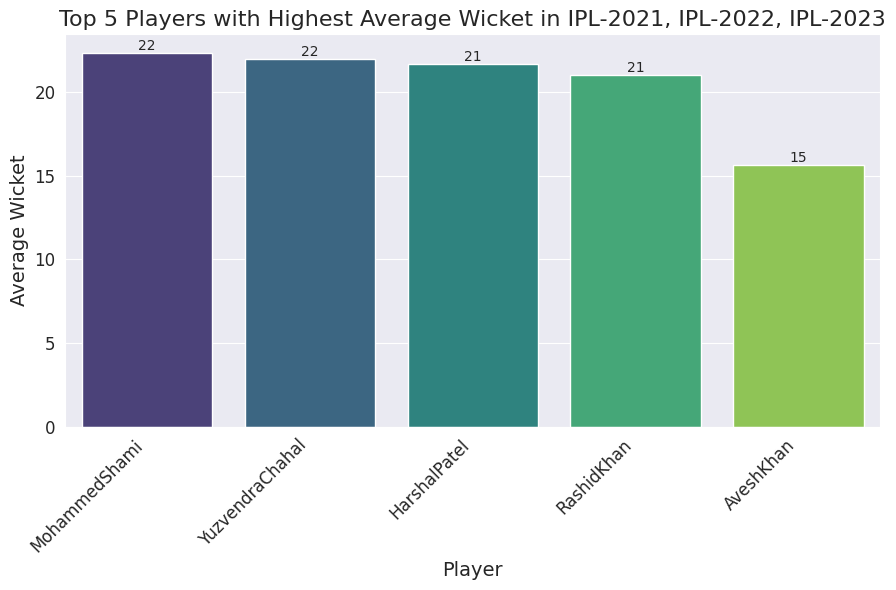

In [371]:
# Set seaborn style
sns.set_style("darkgrid")
# Your code for creating the plot goes here
top_5_players = bowler_present_in_every_season.sort_values(by='Wicket_All_Seasons', ascending=False).head(5)
plt.figure(figsize=(9,6))
sns.barplot(x=top_5_players.index, y='Wicket_All_Seasons', data=top_5_players, palette='viridis')
plt.title('Top 5 Players with Highest Average Wicket in IPL-2021, IPL-2022, IPL-2023', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Average Wicket', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height()):,}", (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')
plt.tight_layout()
plt.show()

In [ ]:
bowler_present_in_every_season.sort_values(by='Average_Improvement_All_Seasons',ascending=False)

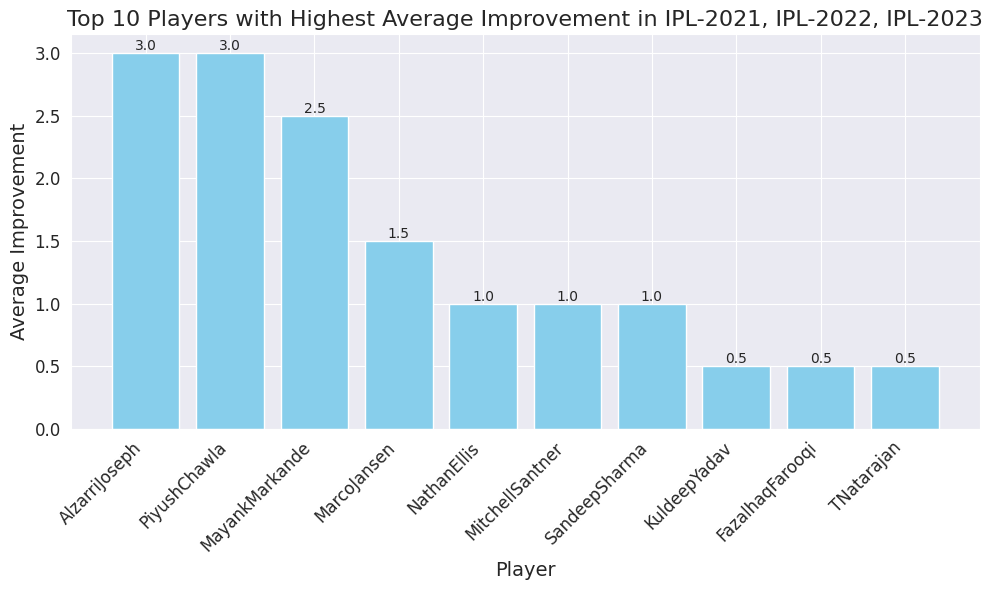

In [138]:
# Sort the DataFrame by average improvement across all seasons in descending order
top_10_players_improvement = bowler_present_in_every_season.sort_values(by='Average_Improvement_All_Seasons', ascending=False).head(10)
# Plotting
plt.figure(figsize=(10, 6))
# Bar plot for top 5 players
bars = plt.bar(top_10_players_improvement.index, top_10_players_improvement['Average_Improvement_All_Seasons'], color='skyblue')
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom', fontsize=10)
# Add labels and title
plt.title('Top 10 Players with Highest Average Improvement in IPL-2021, IPL-2022, IPL-2023', fontsize=16)
plt.xlabel('Player', fontsize=14)
plt.ylabel('Average Improvement', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
# Show plot
plt.tight_layout()
plt.show()

In [340]:
# Filter the DataFrame to include data only for seasons IPL-2021 to IPL-2023
filtered_df_2 = df_bowling_group[df_bowling_group['Season'].isin(['IPL-2021', 'IPL-2022', 'IPL-2023'])]

# Group the filtered data by 'bowlerName' and 'Season' and calculate the average runs scored by each batsman per season
bowler_performance_2 = filtered_df_2.groupby(['bowlerName', 'Season'])['balls'].sum().unstack()

# Fill missing values (if any) with 0
bowler_performance_2= bowler_performance_2.fillna(0)

# Calculate the average runs per season for each batsman
bowler_performance_2['balls_IPL_2021'] = bowler_performance_2['IPL-2021']
bowler_performance_2['balls_IPL_2022'] = bowler_performance_2['IPL-2022']
bowler_performance_2['balls_IPL_2023'] = bowler_performance_2['IPL-2023']

# Drop unnecessary columns
bowler_performance_2 = bowler_performance_2[['balls_IPL_2021', 'balls_IPL_2022', 'balls_IPL_2023']]

# Print or analyze the performance comparison
bowler_performance_2['Total_balls'] = bowler_performance_2['balls_IPL_2021']+bowler_performance_2['balls_IPL_2022']+bowler_performance_2['balls_IPL_2023']


In [341]:
# Filter the DataFrame to include only players who played in every season
bowler_present_in_every_season_2 = bowler_performance_2[(bowler_performance_2['balls_IPL_2021'] > 0) &
                                              (bowler_performance_2['balls_IPL_2022'] > 0) &
                                              (bowler_performance_2['balls_IPL_2023'] > 0)]

In [ ]:
bowler_present_in_every_season_2.sort_values(by='Total_balls',ascending=False)

In [143]:
bowler_present_in_every_season = bowler_present_in_every_season.merge(bowler_present_in_every_season_2, on='bowlerName', how='inner')

In [144]:
bowler_present_in_every_season['Total_Wickets']=bowler_present_in_every_season['Wickets_IPL_2021']+bowler_present_in_every_season['Wickets_IPL_2022']+bowler_present_in_every_season['Wickets_IPL_2023']

In [146]:
bowler_present_in_every_season['Bowler_Efficiency']=(bowler_present_in_every_season['Total_Wickets']/bowler_present_in_every_season['Total_balls'])*100

In [ ]:
bowler_present_in_every_season.sort_values(by='Bowler_Efficiency',ascending=False)

Index(['Wickets_IPL_2021', 'Wickets_IPL_2022', 'Wickets_IPL_2023',
       'Improvement_from_2022_to_2023', 'Improvement_from_2021_to_2022',
       'Wicket_All_Seasons', 'Average_Improvement_All_Seasons',
       'balls_IPL_2021', 'balls_IPL_2022', 'balls_IPL_2023', 'Total_balls',
       'Total_Wickets', 'Bowler_Efficiency'],
      dtype='object', name='Season')


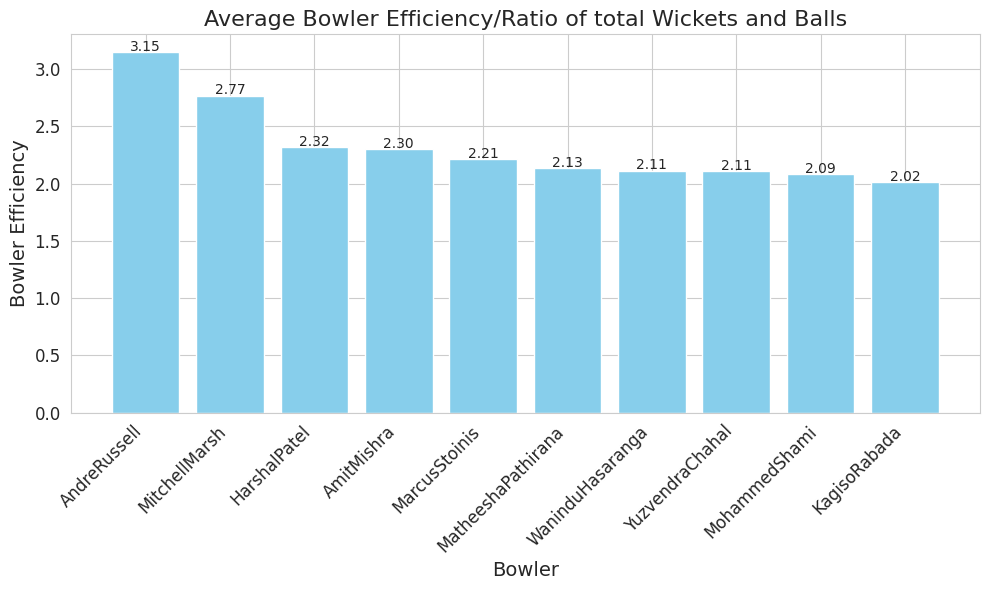

In [257]:
import matplotlib.pyplot as plt

# Check column names
print(bowler_present_in_every_season.columns)

# Set seaborn style
plt.figure(figsize=(10, 6))

# Sort the DataFrame by 'Bowler_Efficiency' in descending order
sorted_data = bowler_present_in_every_season.sort_values(by='Bowler_Efficiency', ascending=False).head(10)

# Plot the data
plt.bar(sorted_data.index, sorted_data['Bowler_Efficiency'], color='skyblue')

# Add labels and title
plt.title('Average Bowler Efficiency/Ratio of total Wickets and Balls', fontsize=16)
plt.xlabel('Bowler', fontsize=14)
plt.ylabel('Bowler Efficiency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for i, efficiency in enumerate(sorted_data['Bowler_Efficiency']):
    plt.text(i, efficiency + 0.01, f'{efficiency:.2f}', ha='center', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()

"Based on comprehensive analysis and predictive modeling, it is forecasted that Harshal Patel is poised to emerge as the Purple Cap Player for the IPL 2024 season. Our analysis reveals that Harshal Patel ranks within the top 3 bowlers for the maximum number of wickets taken across the past three seasons. Furthermore, his exceptional ball-to-wicket ratio places him in the upper echelons of bowling efficiency, reaffirming his prowess on the field. With a track record of consistent performance and a strategic edge in wicket-taking ability, Harshal Patel stands as a formidable contender for the prestigious Purple Cap title in the upcoming IPL season."

#Task-Top 4 qualifying teams

In [ ]:
# Calculate total matches played by each team
total_matches = df_match_summary['team1'].value_counts() + df_match_summary['team2'].value_counts()
# Calculate total matches won by each team
matches_won = df_match_summary['winner'].value_counts()
# Calculate win percentage for each team
win_percentage = (matches_won / total_matches) * 100
# Rank the teams based on win percentage
ranked_teams = win_percentage.sort_values(ascending=False)
# Select top qualifying teams (e.g., top 4 teams)
top_qualifying_teams = ranked_teams.head(4)


<ipython-input-370-6f809d334682>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_qualifying_teams.index, y=top_qualifying_teams.values, palette='viridis')


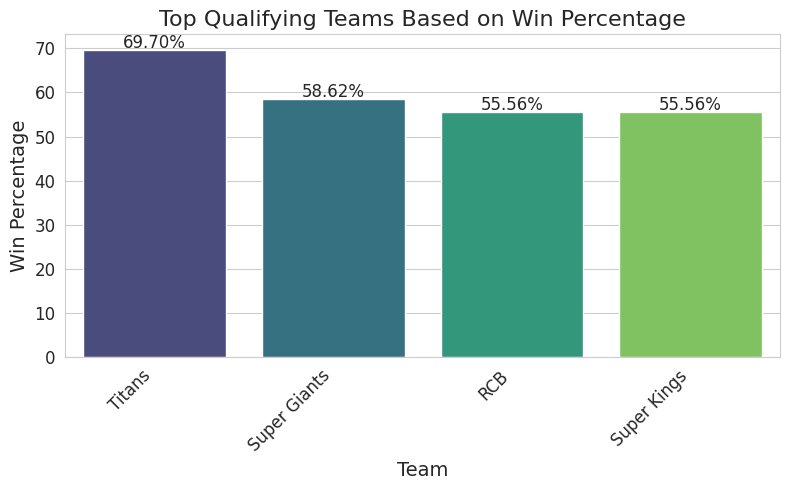

In [370]:
# Set style
sns.set_style("whitegrid")
# Create a bar plot for top qualifying teams
plt.figure(figsize=(8,5))
barplot = sns.barplot(x=top_qualifying_teams.index, y=top_qualifying_teams.values, palette='viridis')
# Add annotations to the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f') + '%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha = 'center', va = 'center',
                     xytext = (0, 5),
                     textcoords = 'offset points',
                     fontsize=12)
plt.title('Top Qualifying Teams Based on Win Percentage', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Win Percentage', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

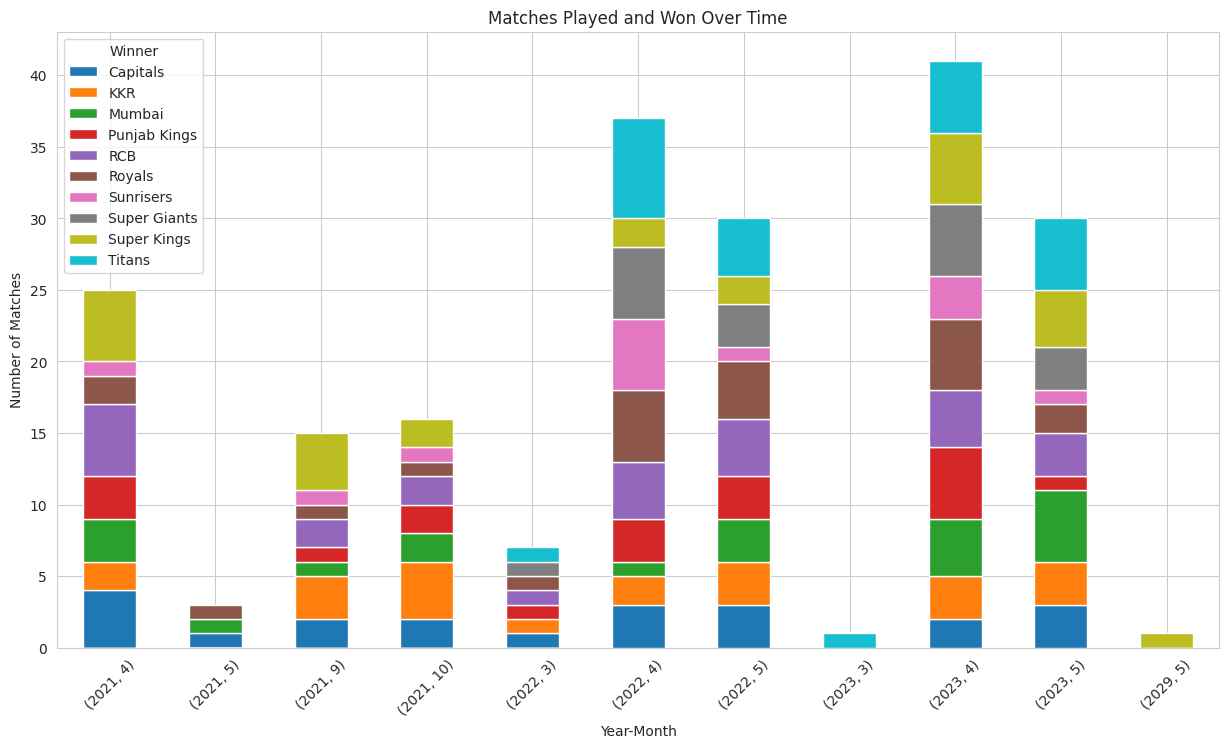

In [151]:
# Convert 'matchDate' column to datetime format
df_match_summary['matchDate'] = pd.to_datetime(df_match_summary['matchDate'])
# Extract month and year from 'matchDate' column
df_match_summary['matchMonth'] = df_match_summary['matchDate'].dt.month
df_match_summary['matchYear'] = df_match_summary['matchDate'].dt.year
# Plot number of matches played and won by each team over months
matches_over_time = df_match_summary.groupby(['matchYear', 'matchMonth', 'winner'])['match_id'].count().unstack()
matches_over_time.plot(kind='bar', figsize=(15, 8), stacked=True)
plt.title('Matches Played and Won Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.legend(title='Winner', loc='upper left')
plt.show()

In [154]:
# Create a pivot table of head-to-head win-loss record
head_to_head = df_match_summary.pivot_table(index='team1', columns='team2', values='winner', aggfunc='count', fill_value=0)

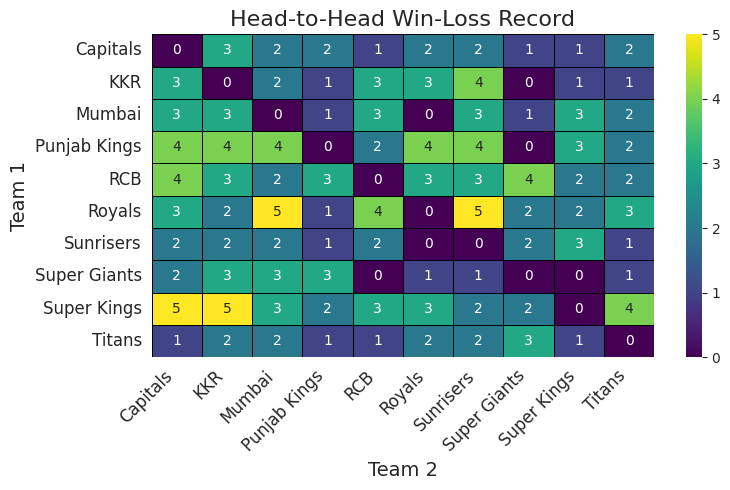

In [368]:
import seaborn as sns
import matplotlib.pyplot as plt
# Set style
sns.set_style("whitegrid")
# Create a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(head_to_head, cmap="viridis", annot=True, fmt="d", linewidths=0.5, linecolor='black', cbar=True)
plt.title('Head-to-Head Win-Loss Record', fontsize=16)
plt.xlabel('Team 2', fontsize=14)
plt.ylabel('Team 1', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [158]:
df_match_summary['win_margin_runs'] = df_match_summary['margin'].apply(lambda x: int(x.split()[0]) if 'runs' in x else None)
df_match_summary['win_margin_wickets'] = df_match_summary['margin'].apply(lambda x: int(x.split()[0]) if 'wickets' in x else None)

In [ ]:
df_match_summary.fillna(0)

In [ ]:
df_match_summary=df_match_summary.drop(['matchMonth','matchDate','match_id'],axis=1)

In [ ]:
df_match_summary.fillna(0)

In [349]:
df_match_summary = df_match_summary.rename(columns={'matchYear': 'Season'})

In [ ]:
df_match_summary.fillna(0)

In [165]:
df_match_summary=df_match_summary.set_index('Season')

In [166]:
df_match_summary_grp1=df_match_summary.groupby('winner',)['win_margin_runs'].mean().reset_index()

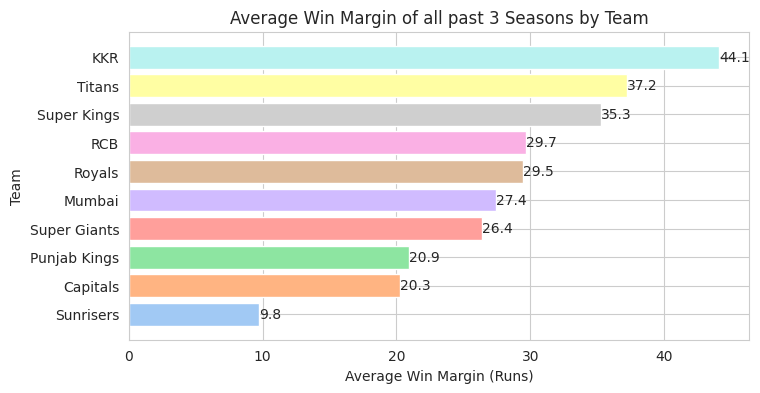

In [364]:
# Sort the DataFrame by 'win_margin_runs' column
df_match_summary_grp1_sorted = df_match_summary_grp1.sort_values(by='win_margin_runs', ascending=True)
# Plotting the results
plt.figure(figsize=(8,4))
# Create horizontal bar plot
colors = sns.color_palette('pastel')  # Choose a colorful palette
bar_plot = plt.barh(df_match_summary_grp1_sorted['winner'], df_match_summary_grp1_sorted['win_margin_runs'], color=colors)
# Adding readings to the bars
for bar in bar_plot:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:.1f}'.format(bar.get_width()),
             va='center', ha='left', fontsize=10)
# Adding labels and title
plt.xlabel('Average Win Margin (Runs)')
plt.ylabel('Team')
plt.title('Average Win Margin of all past 3 Seasons by Team')
# Show plot
plt.show()

In [168]:
# Group by 'winner' and calculate the mean of 'win_margin_wickets' for each group
df_match_summary_grp2 = df_match_summary.groupby('winner')['win_margin_wickets'].mean().reset_index()

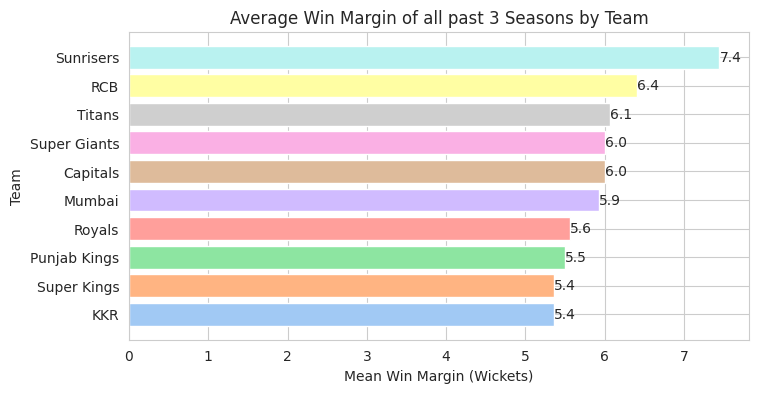

In [365]:
# Sort the DataFrame by 'win_margin_wickets' column
df_match_summary_grp2_sorted = df_match_summary_grp2.sort_values(by='win_margin_wickets', ascending=True)
# Plotting the results
plt.figure(figsize=(8, 4))
# Create horizontal bar plot
colors = sns.color_palette('pastel')  # Choose a colorful palette
bar_plot = plt.barh(df_match_summary_grp2_sorted['winner'], df_match_summary_grp2_sorted['win_margin_wickets'], color=colors)
# Adding readings to the bars
for bar in bar_plot:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, '{:.1f}'.format(bar.get_width()),
             va='center', ha='left', fontsize=10)
# Adding labels and title
plt.xlabel('Mean Win Margin (Wickets)')
plt.ylabel('Team')
plt.title('Average Win Margin of all past 3 Seasons by Team')
# Show plot
plt.show()

#Task-14 Pick your team selecting the Best 11 players based on their positions, 3 years performance data and additional research


This combination of 5 batsmen, 4 bowlers, and 2 all-rounders offers a well-rounded approach to cricket team composition, ensuring a balance between batting depth, bowling variety, and all-round capabilities. With five specialist batsmen, the team can establish a solid foundation for building a competitive score, while the presence of four specialist bowlers enables the team to apply pressure on the opposition and take crucial wickets. Additionally, the inclusion of two all-rounders provides flexibility and depth to the team's lineup, allowing them to adapt to various match situations and contribute significantly with both bat and ball. This balanced combination maximizes the team's chances of success across different formats of the game and under diverse playing conditions, making it an optimal choice for a competitive cricket team.

#Player-1 & 2 In my team will be Shubham gill because he scores maximum runs in past 3 years

In [201]:
top_batsman_on_runs = top_10_batsman_total_runs.head(3)

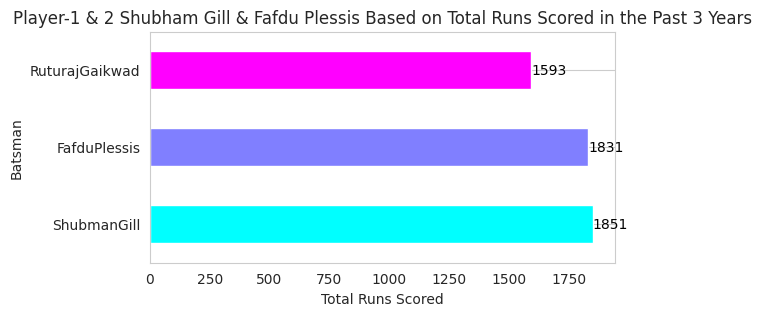

In [361]:
# Plot horizontal bar graph
plt.figure(figsize=(6, 3))
colors = plt.cm.cool(np.linspace(0, 1, len(top_batsman_on_runs)))
bars = top_batsman_on_runs.plot(kind='barh', color=colors)
plt.xlabel('Total Runs Scored')
plt.ylabel('Batsman')
plt.title('Player-1 & 2 Shubham Gill & Fafdu Plessis Based on Total Runs Scored in the Past 3 Years')
plt.grid(axis='x')
# Add total runs scored as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}',
             va='center', ha='left', color='black')

#Player-3 In my team will be Yashasvi Jaiswal because he has maximum batting Average in not out innings into past 3 years.

In [203]:
top_batsmen = batting_average_not_out.sort_values(ascending=False).head(3)

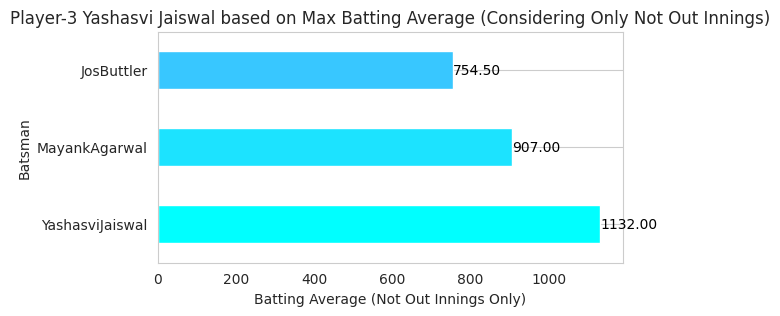

In [360]:
# Plot horizontal bar graph
plt.figure(figsize=(6, 3))
colors = plt.cm.cool(np.linspace(0, 1, len(top_10_batsmen)))
bars = top_batsmen.plot(kind='barh', color=colors)
plt.xlabel('Batting Average (Not Out Innings Only)')
plt.ylabel('Batsman')
plt.title('Player-3 Yashasvi Jaiswal based on Max Batting Average (Considering Only Not Out Innings)')
plt.grid(axis='x')
# Add batting average as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')

#Player-4 In my team will be Patt Cummins because he has Maximum strike rate in past 3 Years.

In [187]:
top_batsmen_strike_rate = strike_rate_filtered.sort_values(ascending=False).head(3)

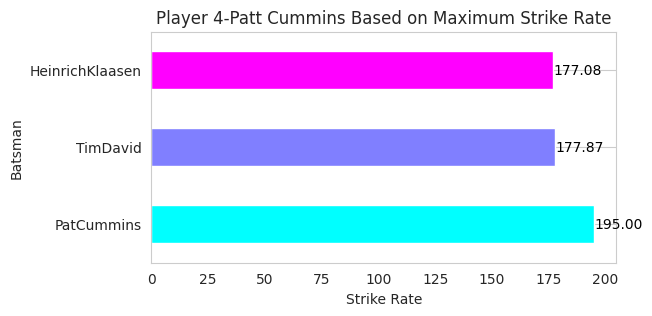

In [359]:
# Plot horizontal bar graph
plt.figure(figsize=(6, 3))
colors = plt.cm.cool(np.linspace(0, 1, len(top_batsmen_strike_rate)))  # Using cool colormap
bars = top_batsmen_strike_rate.plot(kind='barh', color=colors)
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.title('Player 4-Patt Cummins Based on Maximum Strike Rate')
plt.grid(axis='x')

# Add strike rate as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
plt.show()

# Player-5 In my team will be Abhijeet Tomar because he has Maximum Boundry Percentage.

In [206]:
# Sort batsmen based on boundary percentage
top_batsmen_boundary_percentage = boundary_percentage.sort_values(ascending=False).head(3)

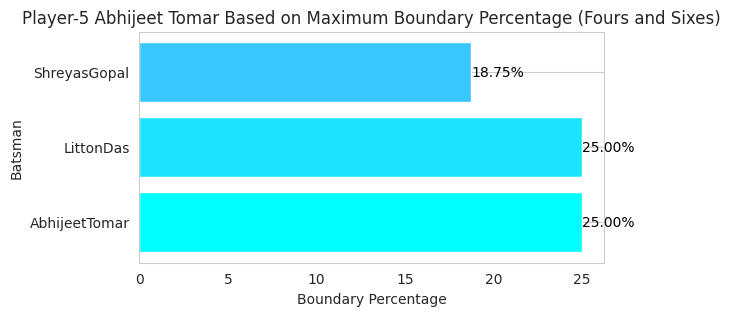

In [358]:
# Plot horizontal bar graph
plt.figure(figsize=(6, 3))
colors = plt.cm.cool(np.linspace(0, 1, len(top_10_batsmen_boundary_percentage)))  # Using autumn colormap
bars = plt.barh(top_batsmen_boundary_percentage.index,top_batsmen_boundary_percentage.values, color=colors)
plt.xlabel('Boundary Percentage')
plt.ylabel('Batsman')
plt.title('Player-5 Abhijeet Tomar Based on Maximum Boundary Percentage (Fours and Sixes)')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
             va='center', ha='left', color='black')
# Show plot
plt.show()

#Player-6 & 7 Will Be Mohammed Shammi and Yuzvendra Chahel Based on Max wickets taken past 3 years.

In [211]:
top_bowlers = total_wickets.sort_values(ascending=False).head(3)

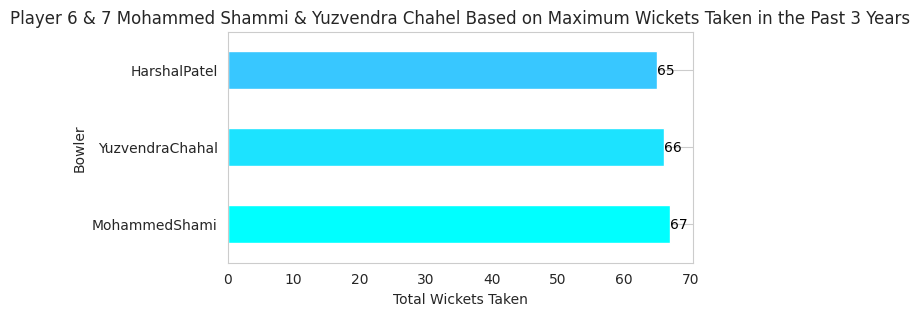

In [357]:
# Plot horizontal bar graph
plt.figure(figsize=(6,3))
colors = plt.cm.cool(np.linspace(0, 1, len(top_10_bowlers)))  # Using spring colormap
bars = top_bowlers.plot(kind='barh', color=colors)
plt.xlabel('Total Wickets Taken')
plt.ylabel('Bowler')
plt.title('Player 6 & 7 Mohammed Shammi & Yuzvendra Chahel Based on Maximum Wickets Taken in the Past 3 Years')
plt.grid(axis='x')
# Add total wickets as text annotations
for i, bar in enumerate(bars.patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width()):d}',
             va='center', ha='left', color='black')
plt.show()

#Player-8 Arshad Khan Based on Bowling Economy Rate

In [242]:
total_balls_bowled = df_bowling_summary.groupby('bowlerName')['balls'].sum()
total_runs_conceded = df_bowling_summary.groupby('bowlerName')['runs'].sum()
# Calculate total overs bowled by each bowler
total_overs_bowled = total_balls_bowled / 6  # Assuming 6 balls per over
# Calculate economy rate for each bowler (total runs conceded / total overs bowled)
economy_rate = total_runs_conceded / total_overs_bowled
# Filter bowlers who have bowled less than 60 balls in each season
bowlers_above_threshold = total_balls_bowled[total_balls_bowled >= 60]
# Select economy rate for bowlers who have bowled at least 60 balls in each season
economy_rate_filtered = economy_rate.loc[bowlers_above_threshold.index]
# Sort bowlers based on economy rate
top_3_bowlers_economy_rate = economy_rate_filtered.sort_values(ascending=False).head(3)

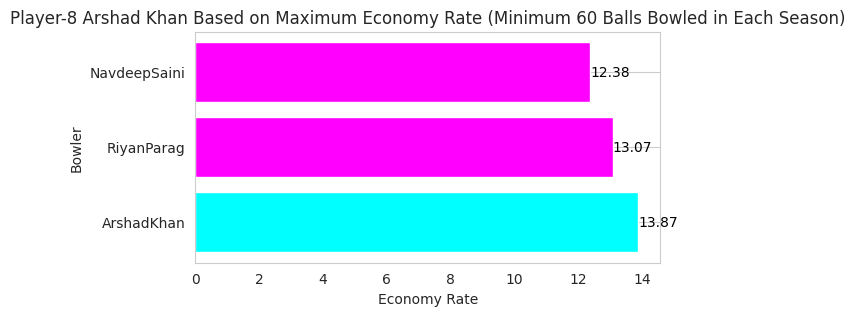

In [356]:
# Plot horizontal bar graph
plt.figure(figsize=(6,3))
colors = plt.cm.cool(np.linspace(0, 2, len(top_3_bowlers_economy_rate)))  # Using summer colormap
bars = plt.barh(top_3_bowlers_economy_rate.index, top_3_bowlers_economy_rate.values, color=colors)
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.title('Player-8 Arshad Khan Based on Maximum Economy Rate (Minimum 60 Balls Bowled in Each Season)')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}',
             va='center', ha='left', color='black')
# Show plot
plt.show()

In [ ]:
dot_balls = df_bowling_summary.groupby('bowlerName')['0s'].sum()
total_balls=df_bowling_summary.groupby('bowlerName')['balls'].sum()
# Calculate dot ball percentage for each bowler
dot_ball_percentage = (dot_balls / total_balls) * 100
# Sort bowlers based on dot ball percentage
top_bowlers_dot_ball_percentage = dot_ball_percentage.sort_values(ascending=False).head(3)

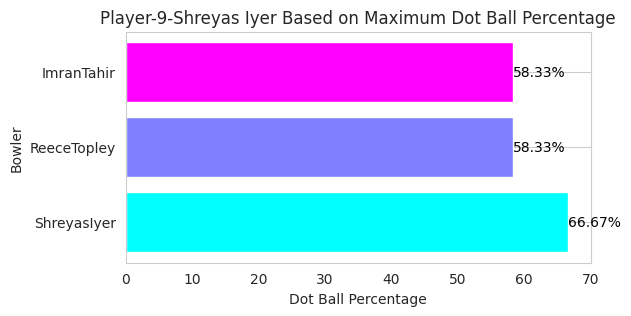

In [355]:
# Plot horizontal bar graph
plt.figure(figsize=(6, 3))
colors = plt.cm.cool(np.linspace(0, 1, len(top_bowlers_dot_ball_percentage)))  # Using spring colormap
bars = plt.barh(top_bowlers_dot_ball_percentage.index, top_bowlers_dot_ball_percentage.values, color=colors)
plt.xlabel('Dot Ball Percentage')
plt.ylabel('Bowler')
plt.title('Player-9-Shreyas Iyer Based on Maximum Dot Ball Percentage')
plt.grid(axis='x')
# Add values on the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%',
             va='center', ha='left', color='black')
# Show plot
plt.show()

In [277]:
df_batting_summary_group=df_batting_summary.groupby('batsmanName')['runs'].sum().reset_index()

In [279]:
df_batting_summary_group.columns

Index(['batsmanName', 'runs'], dtype='object')

In [278]:
df_bowling_summary_group=df_bowling_summary.groupby('bowlerName')['wickets'].sum().reset_index()

In [351]:
# Merge the datasets on common player name
all_rounders_data=pd.merge(df_bowling_summary_group, df_batting_summary_group, how='inner', left_on='bowlerName', right_on='batsmanName')
# Drop the duplicate column (batsmanName)
all_rounders_data.drop(columns=['batsmanName'], inplace=True)
# Alternatively, if you want to keep both batsmanName and bowlerName columns:
all_rounders_data.rename(columns={'bowlerName': 'playerName'}, inplace=True)

In [292]:
top_all_rounders_max_runs=all_rounders_data.sort_values(by="runs",ascending=False).head(3)

In [294]:
top_all_rounders_max_wickets=all_rounders_data.sort_values(by="wickets",ascending=False).head(3)

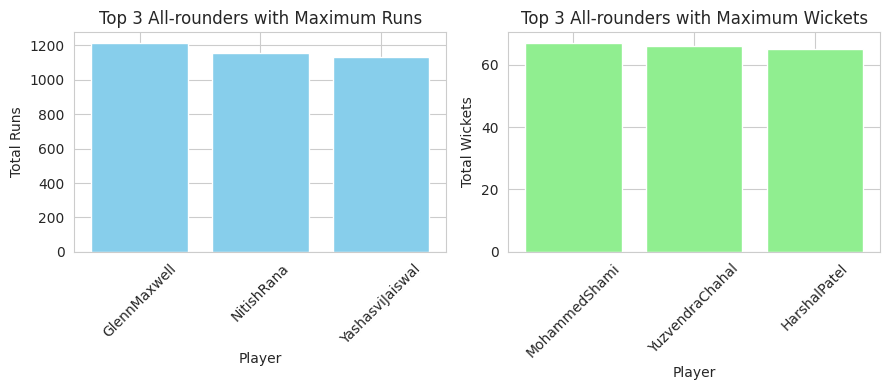

In [354]:
# Plotting the top 3 all-rounders with maximum runs
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.bar(top_all_rounders_max_runs['playerName'], top_all_rounders_max_runs['runs'], color='skyblue')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.title('Top 3 All-rounders with Maximum Runs')
plt.xticks(rotation=45)
plt.tight_layout()
# Plotting the top 3 all-rounders with maximum wickets
plt.subplot(1, 2, 2)
plt.bar(top_all_rounders_max_wickets['playerName'], top_all_rounders_max_wickets['wickets'], color='lightgreen')
plt.xlabel('Player')
plt.ylabel('Total Wickets')
plt.title('Top 3 All-rounders with Maximum Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
# Show the plot
plt.show()

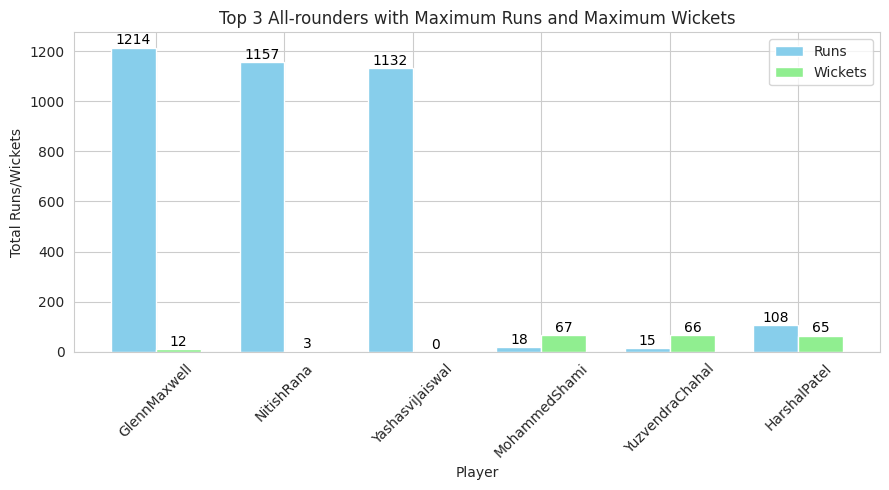

In [302]:
# Combine both dataframes into one
combined_data = pd.concat([top_all_rounders_max_runs, top_all_rounders_max_wickets])
# Set the figure size
plt.figure(figsize=(9, 5))
# Plot the results
bar_width = 0.35
plt.bar(np.arange(len(combined_data)), combined_data['runs'], color='skyblue', label='Runs', width=bar_width)
plt.bar(np.arange(len(combined_data)) + bar_width, combined_data['wickets'], color='lightgreen', label='Wickets', width=bar_width)
# Set the xticks and labels
plt.xticks(np.arange(len(combined_data)) + bar_width / 2, combined_data['playerName'], rotation=45)
# Add labels to each bar
for i, (runs, wickets) in enumerate(zip(combined_data['runs'], combined_data['wickets'])):
    plt.text(i, runs + 0.5, str(runs), ha='center', va='bottom', color='black')
    plt.text(i + bar_width, wickets + 0.5, str(wickets), ha='center', va='bottom', color='black')
# Add labels and title
plt.xlabel('Player')
plt.ylabel('Total Runs/Wickets')
plt.title('Top 3 All-rounders with Maximum Runs and Maximum Wickets')
plt.legend()
# Show the plot
plt.tight_layout()
plt.show()

#Player 10 & 11 will be Harshal Patel and GlennMaxwell